<h1 style="background-color: #4682B4; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Predicting Vehicle CO2 Emissions with Linear and Regularized Regression Models</b>
</h1>

**Dataset Overview**

This dataset contains information about various vehicles, focusing on carbon dioxide (CO2) emissions and fuel consumption. It is commonly used in Machine Learning (ML) to predict CO2 emissions based on vehicle characteristics or to analyze vehicle fuel efficiency. The dataset has 7385 rows and 12 columns.

**Columns Description:**

1. **Make:** The brand of the vehicle.
2. **Model:** The model of the vehicle.
3. **Vehicle Class:** The class/type of the vehicle (e.g., compact, SUV).
4. **Engine Size (L):** Engine size in liters.
5. **Cylinders:** Number of cylinders in the engine.
6. **Transmission:** Type of transmission (e.g., automatic, manual).
7. **Fuel Type:** Type of fuel used (e.g., gasoline, diesel).
8. **Fuel Consumption City (L/100 km):** Fuel consumption in city driving.
9. **Fuel Consumption Hwy (L/100 km):** Fuel consumption on highways.
10. **Fuel Consumption Comb (L/100 km):** Combined city and highway fuel consumption.
11. **Fuel Consumption Comb (mpg):** Combined fuel consumption in miles per gallon.
12. **CO2 Emissions (g/km):** CO2 emissions in grams per kilometer.

**Specific Terms:**

- 4WD/4X4: Four-wheel drive system.
- AWD: All-wheel drive system.
- FFV: Flexible-fuel vehicle (can use multiple fuel types).
- Transmission Types: Include Automatic (A), Manual (M), Automated Manual (AM), Select Shift (AS), Continuously Variable (AV), etc.
- Fuel Types: Regular gasoline (X), Premium gasoline (Z), Diesel (D), Ethanol (E85) (E), Natural gas (N).

This dataset is useful for predicting CO2 emissions and analyzing fuel efficiency based on vehicle specifications.

# EDA and Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [2]:
co2 = pd.read_csv('co2.csv')
df = co2.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.shape

(7385, 12)

In [5]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [6]:
df.describe(include="object").T

count unique            top  freq
Make           7385     42           FORD   628
Model          7385   2053  F-150 FFV 4X4    32
Vehicle Class  7385     16    SUV - SMALL  1217
Transmission   7385     27            AS6  1324
Fuel Type      7385      5              X  3637

In [7]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [8]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [9]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(6282, 12)

In [10]:
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [11]:
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
df.rename(renamed_columns, axis='columns', inplace=True)

In [12]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [13]:
from skimpy import clean_columns

df = clean_columns(df)
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co_2'],
      dtype='object')

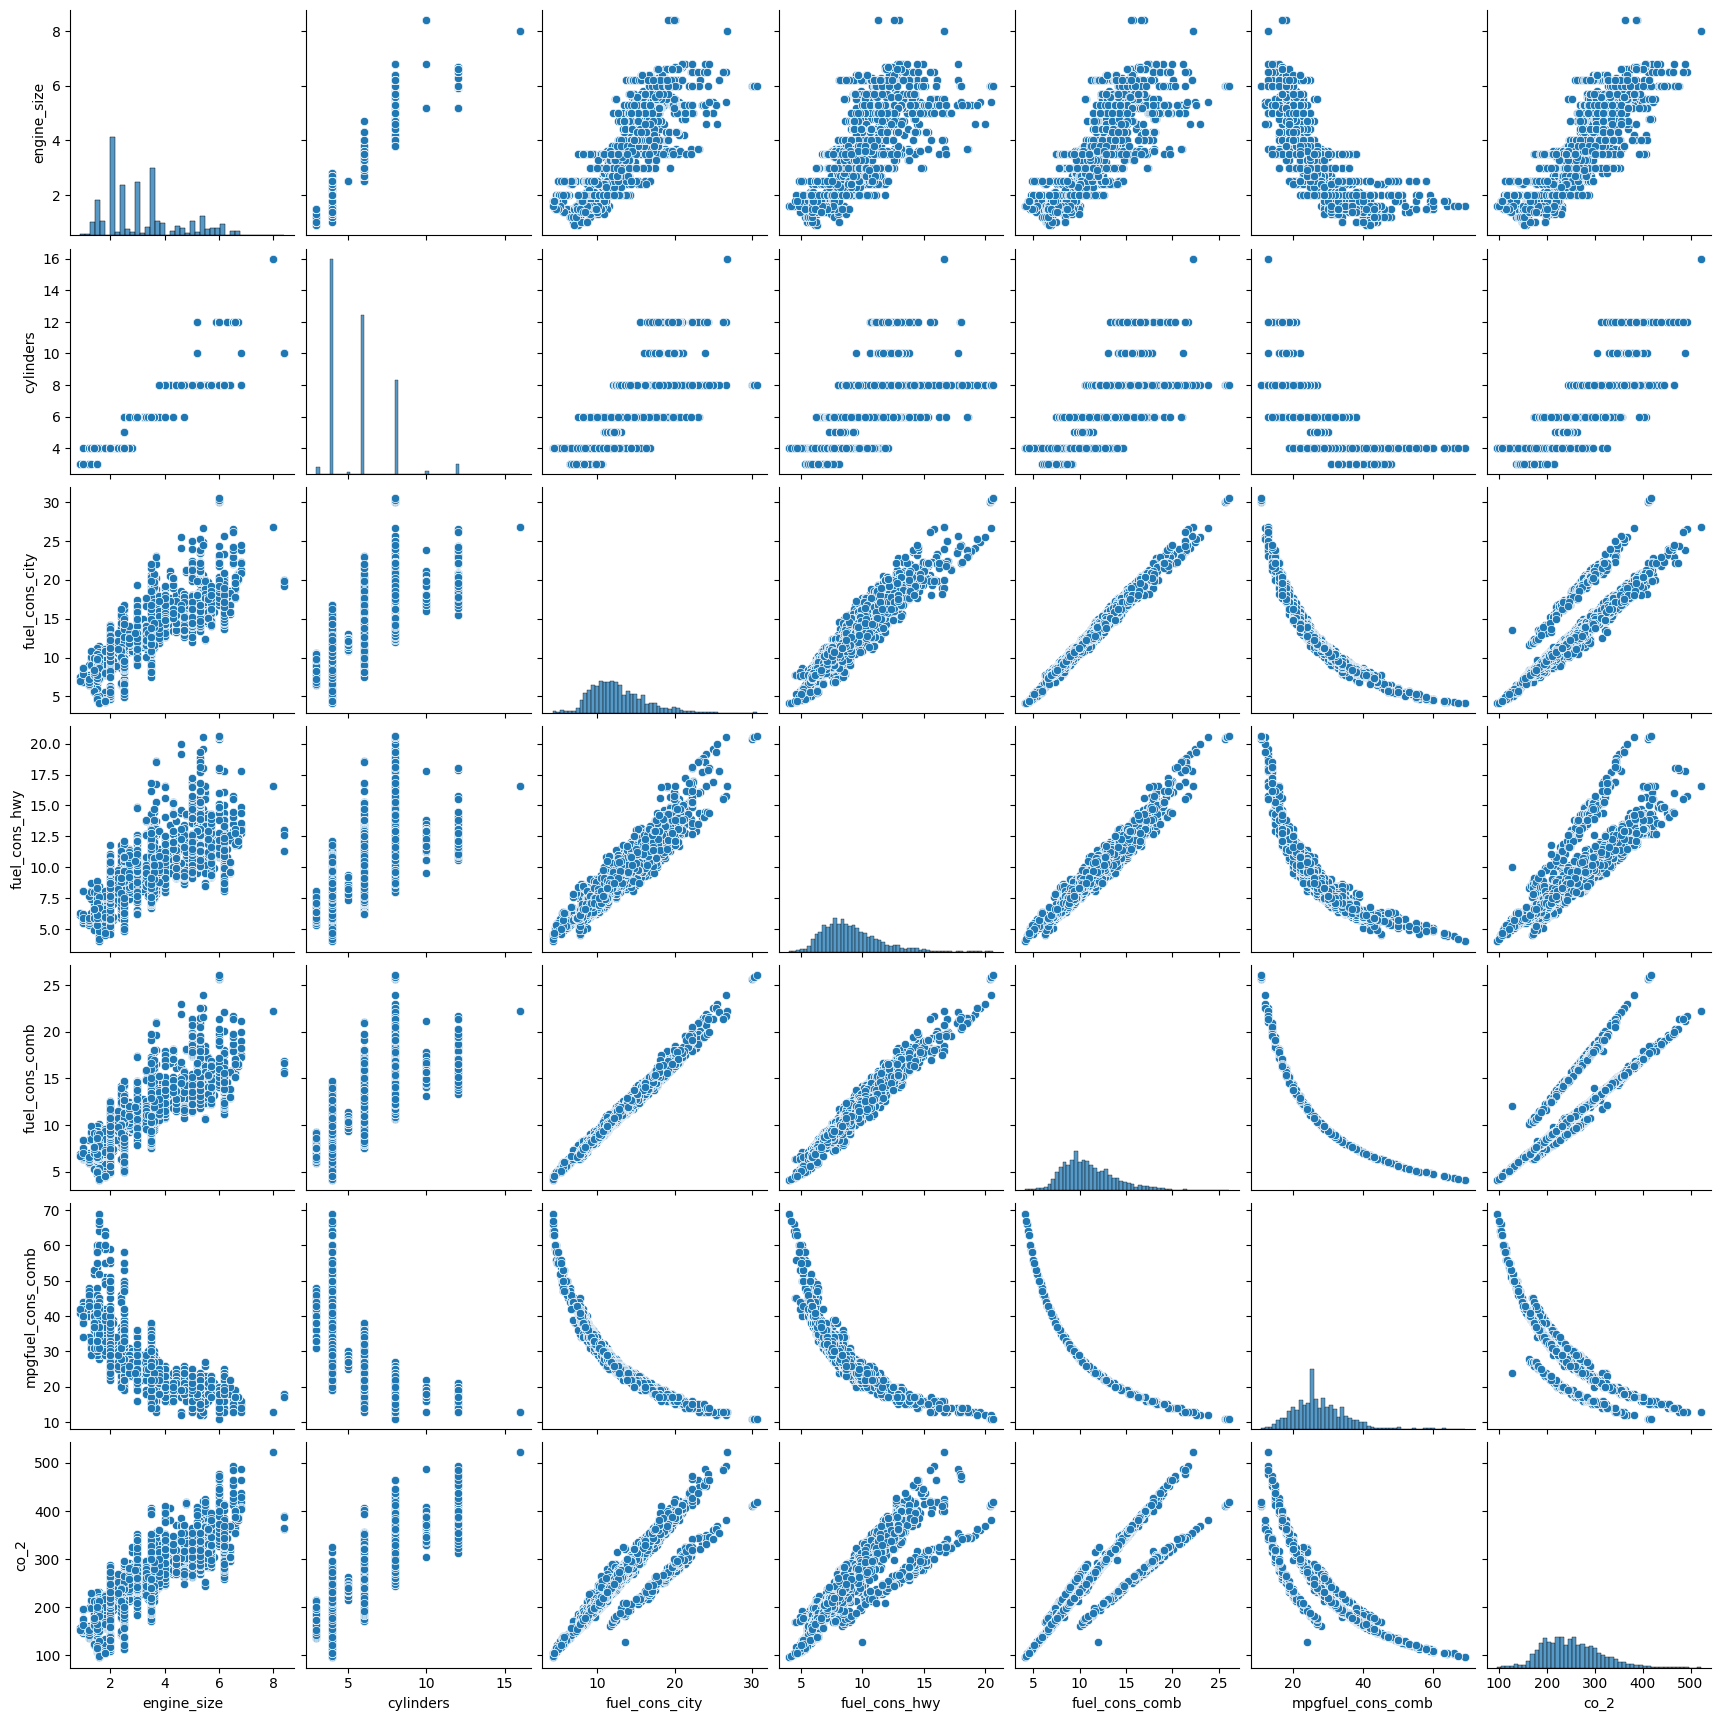

In [14]:
sns.pairplot(df)

## Make

In [15]:
df.make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

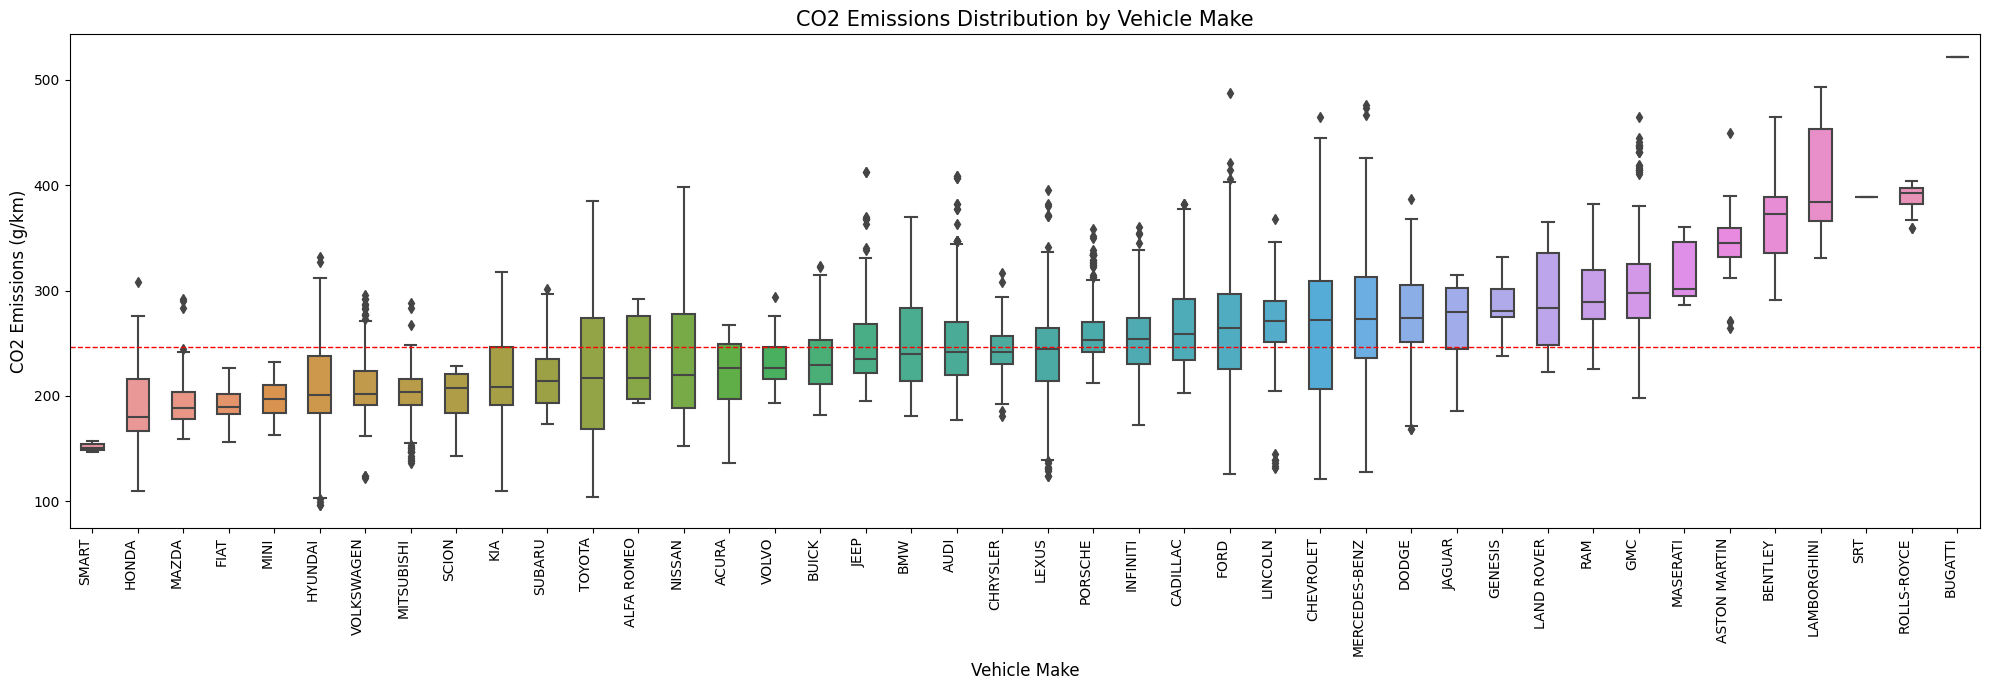

In [16]:
plt.figure(figsize=(20, 7))

make_order = df.groupby("make")["co_2"].median().sort_values().index

sns.boxplot(x="make", y="co_2", data=df, order=make_order, width=0.5)

plt.title("CO2 Emissions Distribution by Vehicle Make", fontsize=15)
plt.xlabel("Vehicle Make", fontsize=12)
plt.ylabel("CO2 Emissions (g/km)", fontsize=12)

plt.xticks(rotation=90, ha='right')

plt.axhline(df["co_2"].median(), color='r', linestyle='--', linewidth=1)

plt.tight_layout()

plt.show()


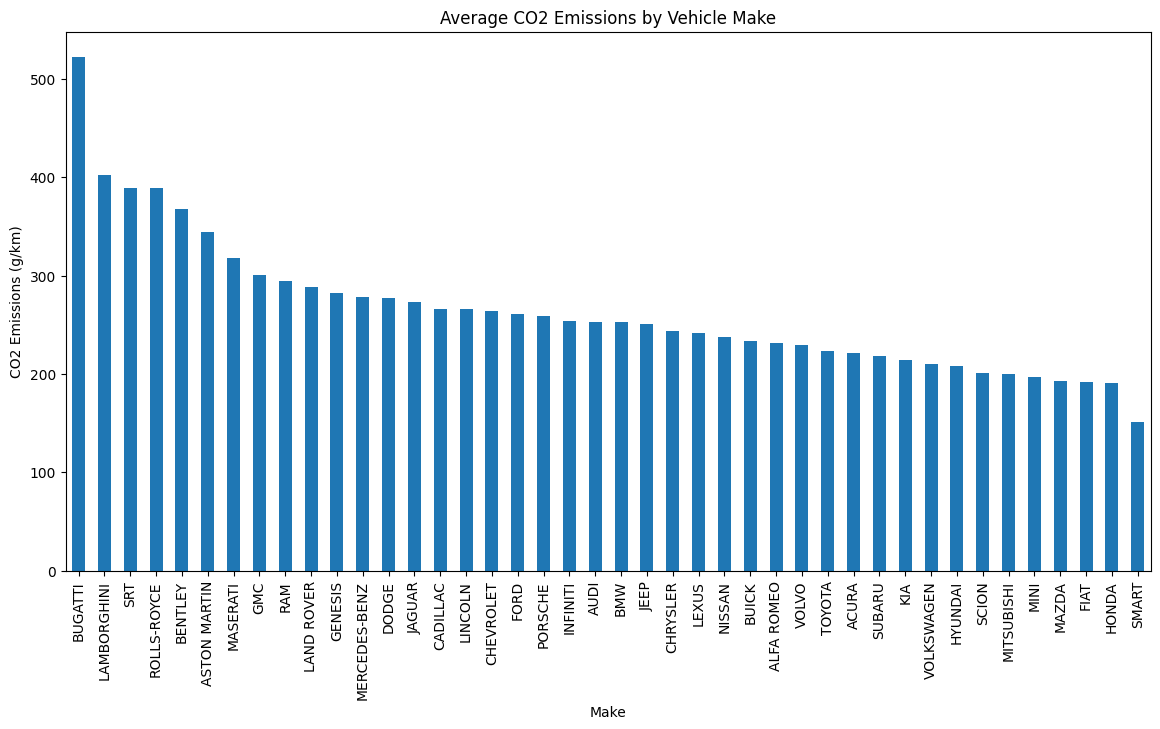

In [17]:
avg_co2_by_make = df.groupby("make")["co_2"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,7))
avg_co2_by_make.plot(kind="bar")
plt.title("Average CO2 Emissions by Vehicle Make")
plt.xlabel("Make")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()


## Model

In [18]:
df.model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

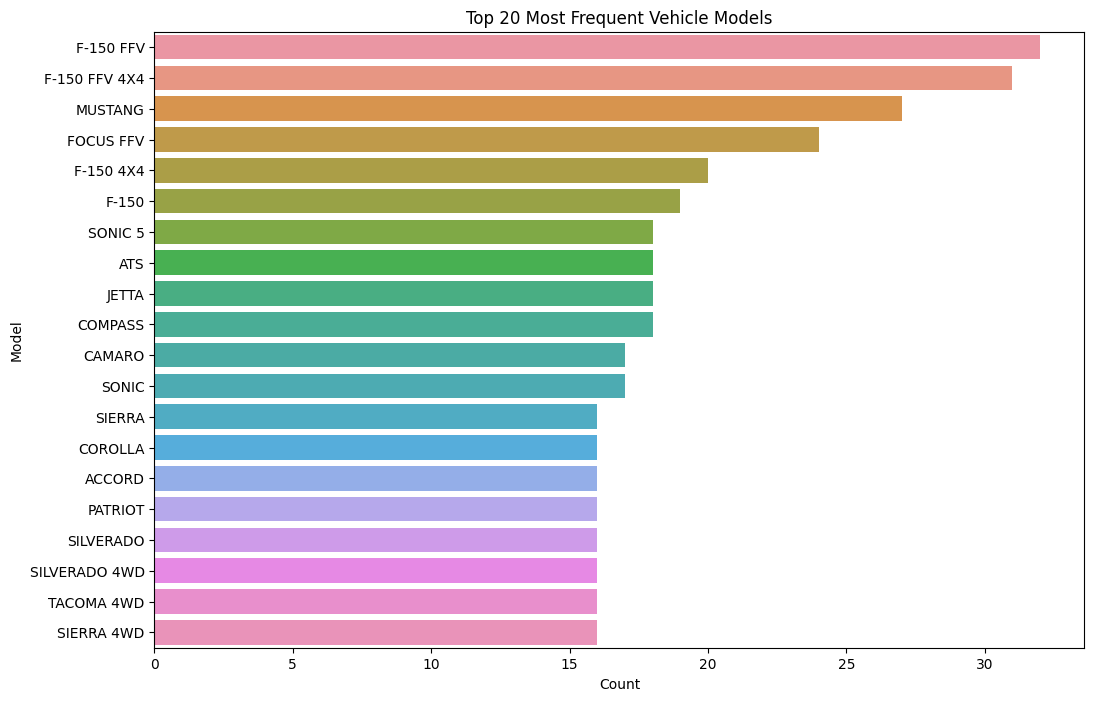

In [19]:
plt.figure(figsize=(12,8))
top_models = df["model"].value_counts().nlargest(20) 
sns.barplot(x=top_models.values, y=top_models.index)
plt.title("Top 20 Most Frequent Vehicle Models")
plt.xlabel("Count")
plt.ylabel("Model")
plt.show()

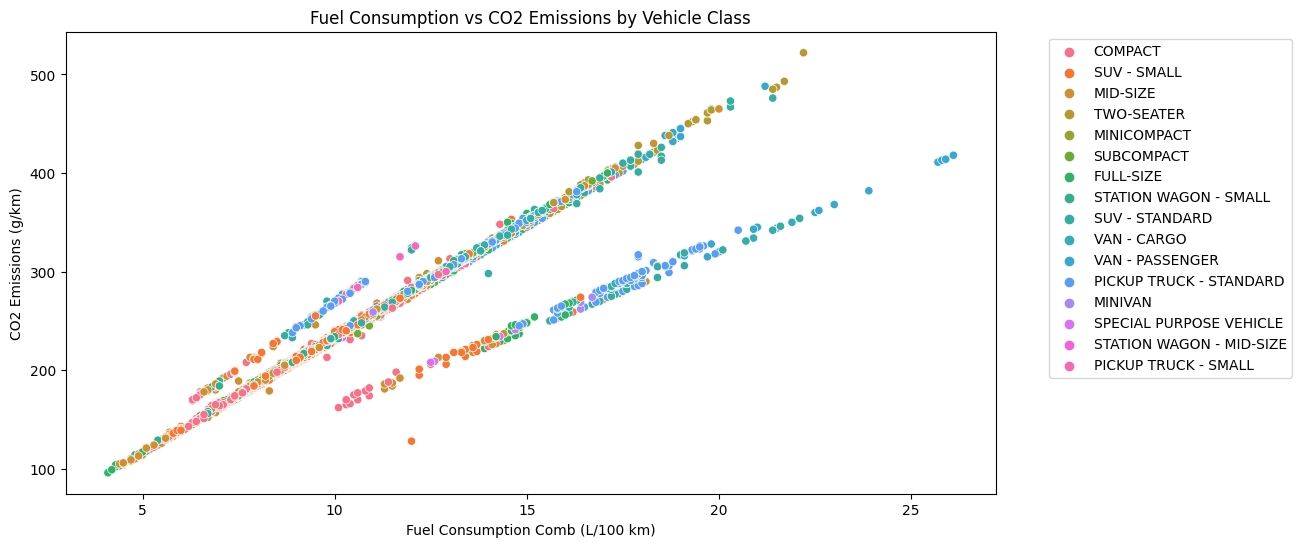

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="fuel_cons_comb", y="co_2", hue="vehicle_class", data=df)
plt.title("Fuel Consumption vs CO2 Emissions by Vehicle Class")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Engine Size(L)

In [21]:
unique_engine_sizes = df["engine_size"].nunique()
print(f"There are {unique_engine_sizes} different engine sizes in the dataset.")

df_engine_size = df["engine_size"].value_counts().reset_index()
df_engine_size.columns = ["Engine Size (L)", "Count"]
df_engine_size.head(20)

There are 51 different engine sizes in the dataset.


Engine Size (L)  Count
0               2.0   1260
1               3.0    687
2               3.6    433
3               3.5    431
4               2.5    355
5               2.4    287
6               1.6    272
7               5.3    240
8               1.8    191
9               5.0    179
10              1.5    176
11              1.4    170
12              4.0    161
13              6.2    141
14              4.4    124
15              3.8    100
16              5.7     92
17              3.7     90
18              2.7     86
19              6.0     86

<Axes: xlabel='engine_size', ylabel='Density'>

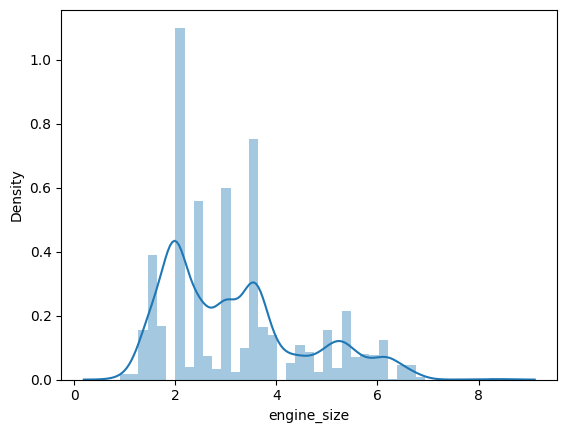

In [22]:
sns.distplot(df["engine_size"])

## Cylinders

In [23]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co_2'],
      dtype='object')

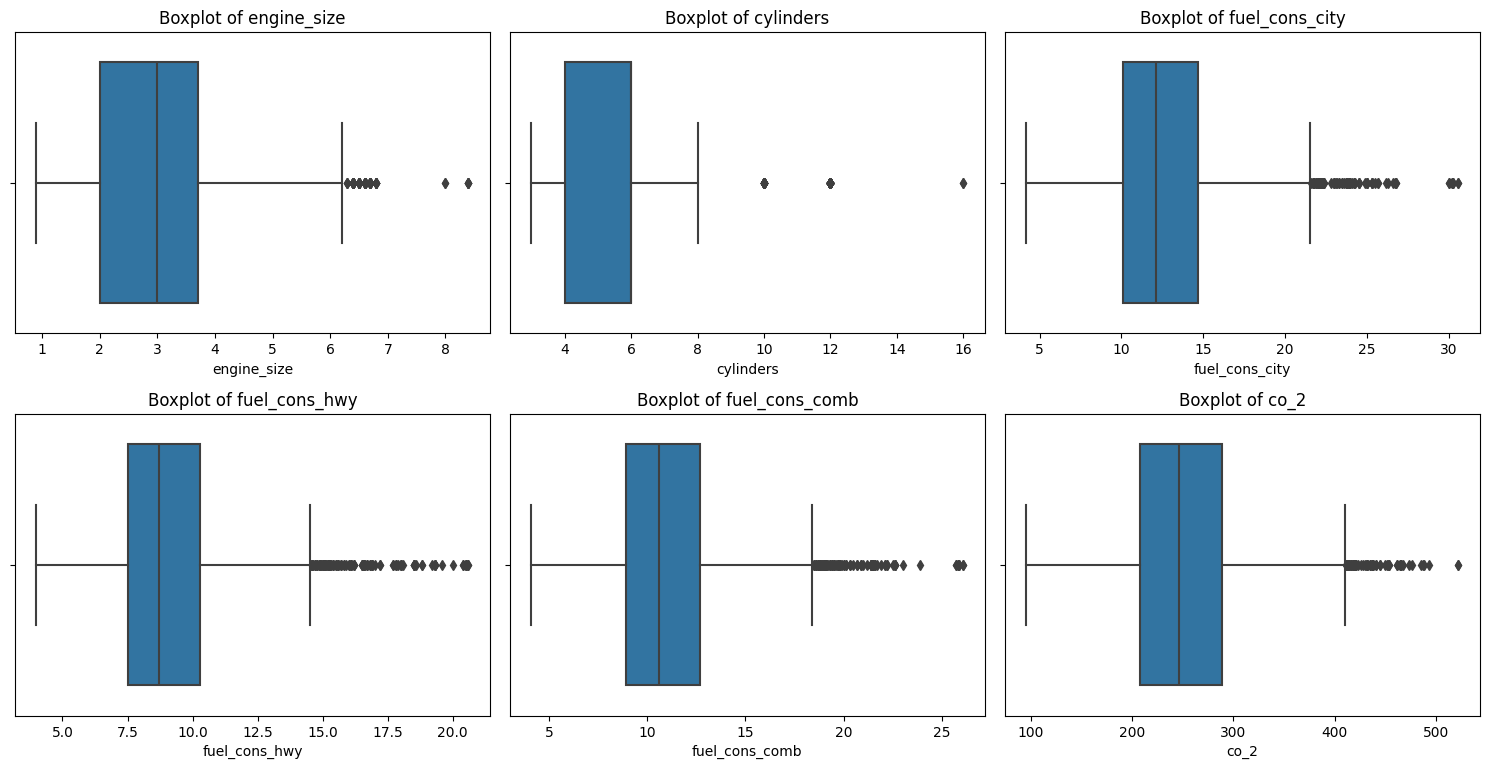

In [24]:
numeric_columns = ['engine_size', 'cylinders', 'fuel_cons_city',
                    'fuel_cons_hwy', 'fuel_cons_comb', 'co_2']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

axes = axes.flatten()

for index, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[index])
    axes[index].set_title(f'Boxplot of {column}')

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Transmission

In [25]:
df.transmission.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

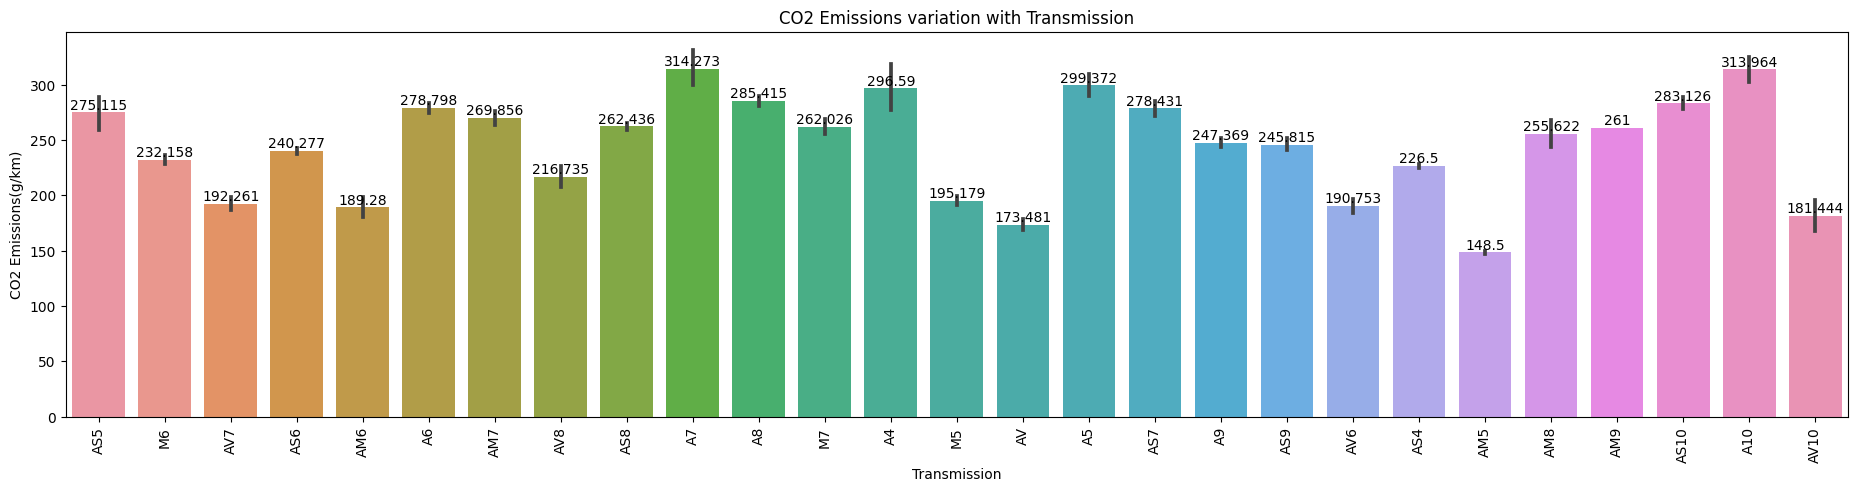

In [26]:
plt.figure(figsize=(23,5))
figure10 = sns.barplot(data = df, x = "transmission",  y= "co_2")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Transmission")
plt.xlabel("Transmission")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure10.containers[0], fontsize=10)
plt.show()

## Fuel Type

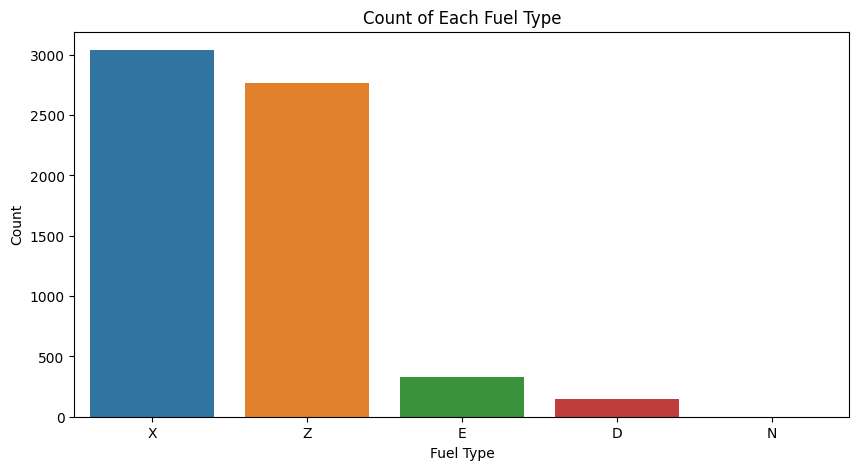

In [27]:
fuel_type_counts = df['fuel_type'].value_counts().reset_index()
fuel_type_counts.columns = ['fuel_type', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(data=fuel_type_counts, x='fuel_type', y='Count')
plt.title('Count of Each Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

In [28]:
df = df[df['fuel_type'] != 'N']

## Fuel Consumption Features

In [29]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co_2'],
      dtype='object')

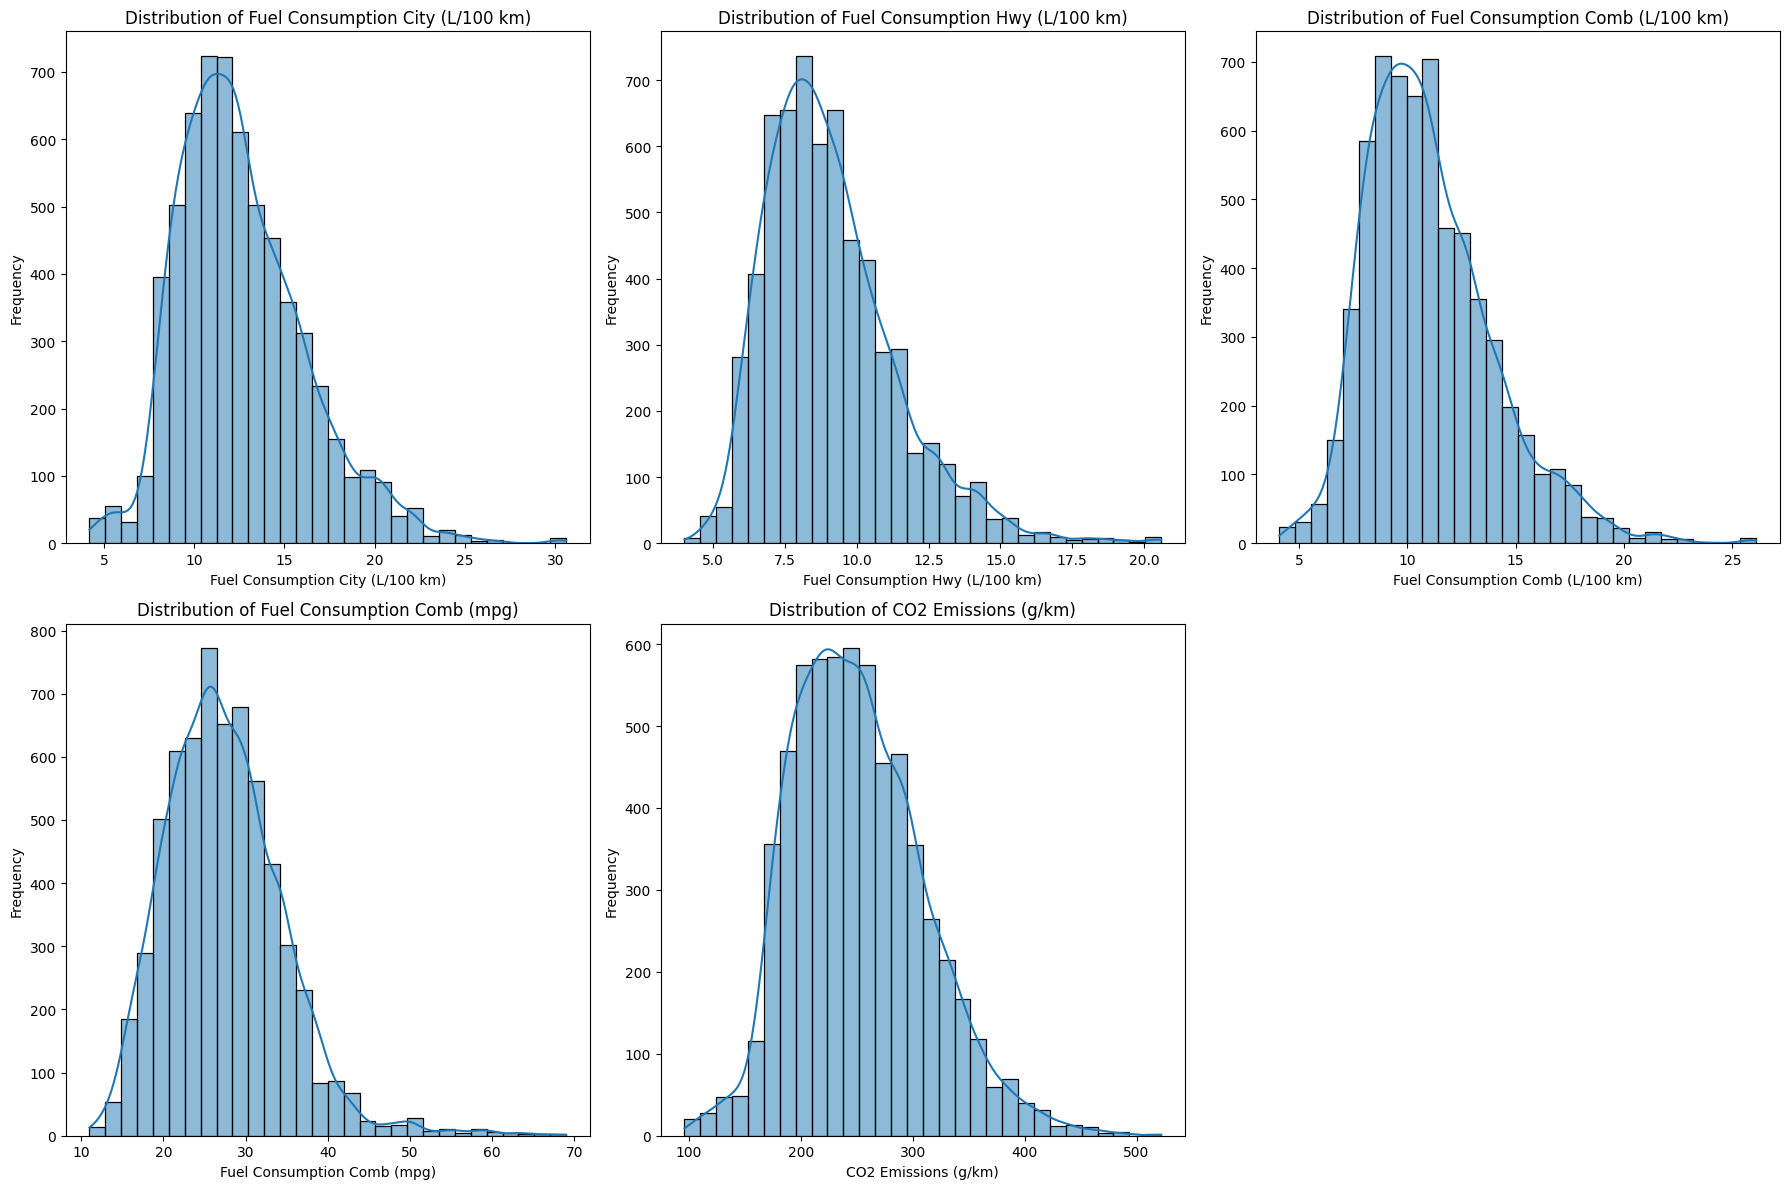

In [30]:
plt.figure(figsize=(18, 12))

# Plot fuel consumption city
plt.subplot(2, 3, 1)
sns.histplot(df['fuel_cons_city'], bins=30, kde=True)
plt.title('Distribution of Fuel Consumption City (L/100 km)')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Frequency')

# Plot fuel consumption hwy
plt.subplot(2, 3, 2)
sns.histplot(df['fuel_cons_hwy'], bins=30, kde=True)
plt.title('Distribution of Fuel Consumption Hwy (L/100 km)')
plt.xlabel('Fuel Consumption Hwy (L/100 km)')
plt.ylabel('Frequency')

# Plot fuel consumption comb (L/100 km)
plt.subplot(2, 3, 3)
sns.histplot(df['fuel_cons_comb'], bins=30, kde=True)
plt.title('Distribution of Fuel Consumption Comb (L/100 km)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')
plt.ylabel('Frequency')

# Plot fuel consumption comb (mpg)
plt.subplot(2, 3, 4)
sns.histplot(df['mpgfuel_cons_comb'], bins=30, kde=True)
plt.title('Distribution of Fuel Consumption Comb (mpg)')
plt.xlabel('Fuel Consumption Comb (mpg)')
plt.ylabel('Frequency')

# Plot CO2 emissions
plt.subplot(2, 3, 5)
sns.histplot(df['co_2'], bins=30, kde=True)
plt.title('Distribution of CO2 Emissions (g/km)')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

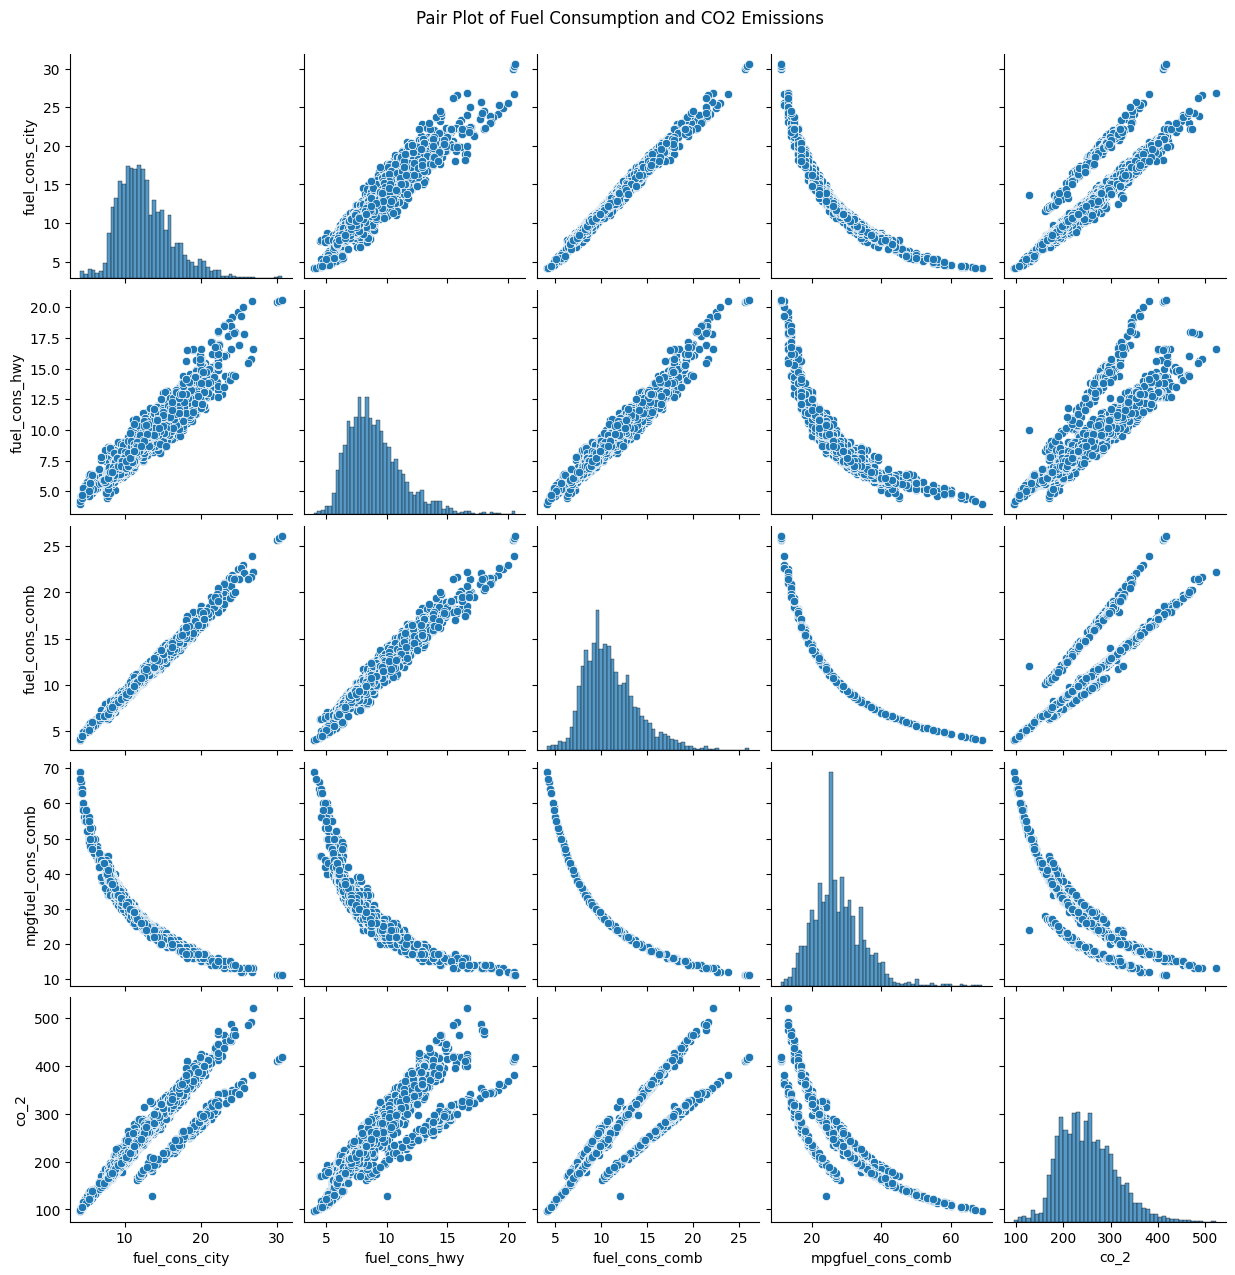

In [31]:
import seaborn as sns

columns_of_interest = [
    'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'mpgfuel_cons_comb',
    'co_2'
]

sns.pairplot(df[columns_of_interest])
plt.suptitle('Pair Plot of Fuel Consumption and CO2 Emissions', y=1.02)
plt.show()

## CO2 Emissions(g/km)

<Axes: xlabel='co_2', ylabel='Density'>

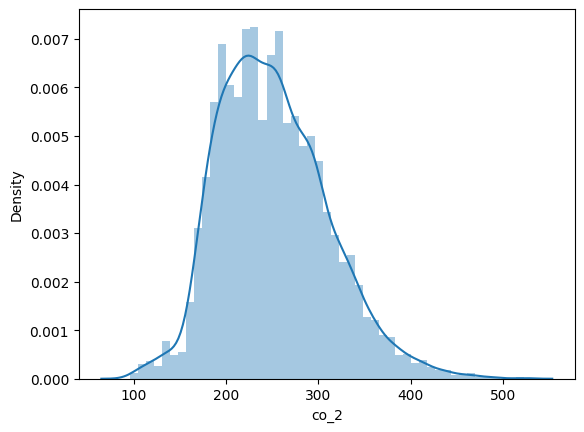

In [32]:
sns.distplot(df['co_2'])

In [33]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co_2'],
      dtype='object')

In [34]:
df.drop([
    'make', 'model', 'transmission',
    'mpgfuel_cons_comb'
],
        inplace=True,
        axis=1)

In [35]:
df.head()

vehicle_class  engine_size  cylinders fuel_type  fuel_cons_city  \
0       COMPACT          2.0          4         Z             9.9   
1       COMPACT          2.4          4         Z            11.2   
2       COMPACT          1.5          4         Z             6.0   
3   SUV - SMALL          3.5          6         Z            12.7   
4   SUV - SMALL          3.5          6         Z            12.1   

   fuel_cons_hwy  fuel_cons_comb  co_2  
0            6.7             8.5   196  
1            7.7             9.6   221  
2            5.8             5.9   136  
3            9.1            11.1   255  
4            8.7            10.6   244

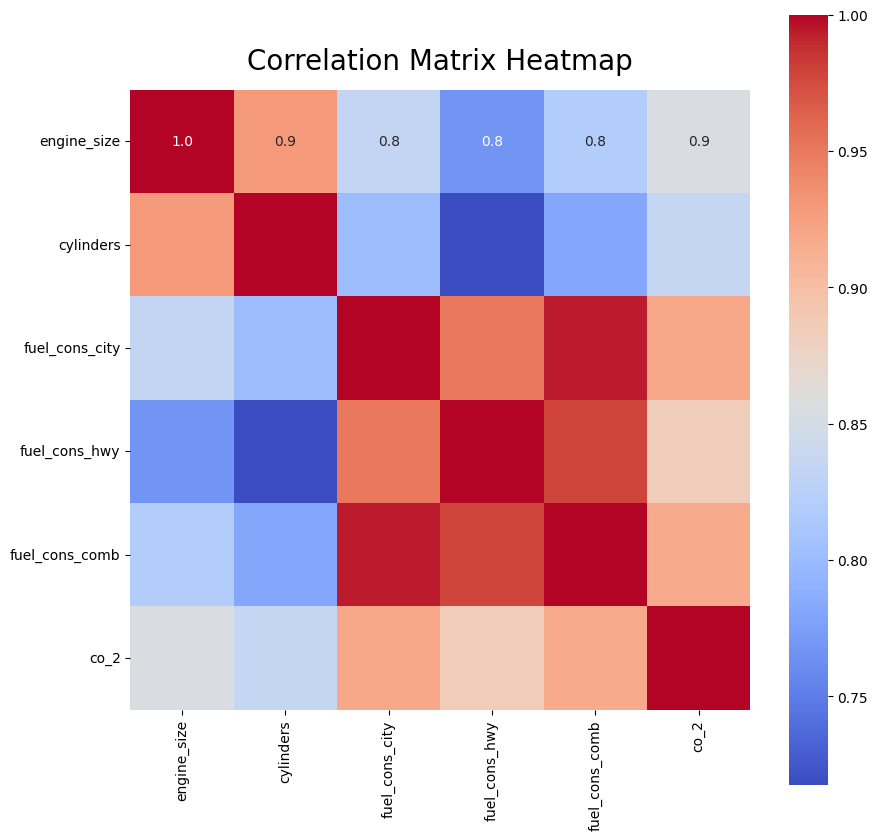

In [36]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(numeric_df.corr(), 
                      cbar=True, 
                      square=True, 
                      fmt='.1f', 
                      annot=True, 
                      annot_kws={'size': 10}, 
                      cmap='coolwarm')
heatmap.set_title('Correlation Matrix Heatmap', 
                   fontdict={'fontsize': 20}, 
                   pad=15)
plt.show()

# Simple Linear Regression Model

## Splitting the dataset into X (independent variables) and y (dependent variable)

In [37]:
X = df[['engine_size']] # independent variable
y = df['co_2'] # dependent variable

## Train | Test Split

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5024, 1)
Train target shape   :  (5024,)
Test features shape  :  (1257, 1)
Test target shape    :  (1257,)


## Training the Model

In [41]:
sl_model = LinearRegression()

In [42]:
sl_model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = sl_model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1009.1040244788112
Mean Absolute Error: 23.86864017480772
R^2 Score: 0.7153447898534099


In [46]:
print(f"Intercept (b0): {sl_model.intercept_}")
print(f"Coefficient (b1): {sl_model.coef_}")

Intercept (b0): 133.83266764273537
Coefficient (b1): [37.12355165]


## Predicting Test Data

In [47]:
y_train_pred = sl_model.predict(X_train)
y_test_pred = sl_model.predict(X_test)

In [48]:
df_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred})
print(df_results)

      Actual   Predicted
0        193  208.079771
1        249  226.641547
2        249  267.477454
3        174  189.517995
4        256  208.079771
...      ...         ...
1252     271  267.477454
1253     244  263.765098
1254     232  245.203323
1255     183  185.805640
1256     315  330.587491

[1257 rows x 2 columns]


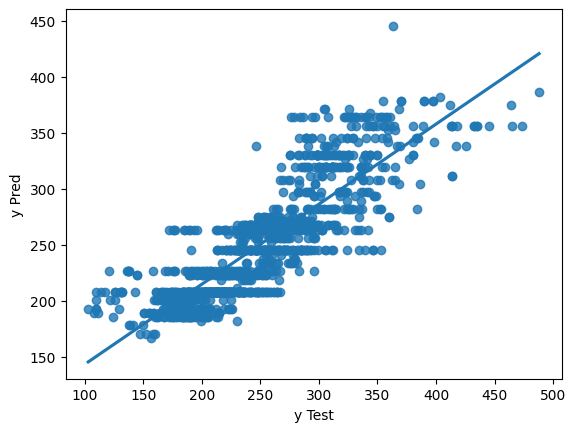

In [49]:
sns.regplot(x=y_test, y=y_pred, ci=None)

plt.xlabel('y Test')
plt.ylabel('y Pred')

plt.show()

## Evaluating the Model

In [50]:
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [51]:
print("Training Data Performance")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R^2 Score: {r2_train}\n")

Training Data Performance
Mean Squared Error: 930.5433448309722
Mean Absolute Error: 23.11222590706738
R^2 Score: 0.734695726381944



In [52]:
print("Test Data Performance")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R^2 Score: {r2_test}")

Test Data Performance
Mean Squared Error: 1009.1040244788112
Mean Absolute Error: 23.86864017480772
R^2 Score: 0.7153447898534099


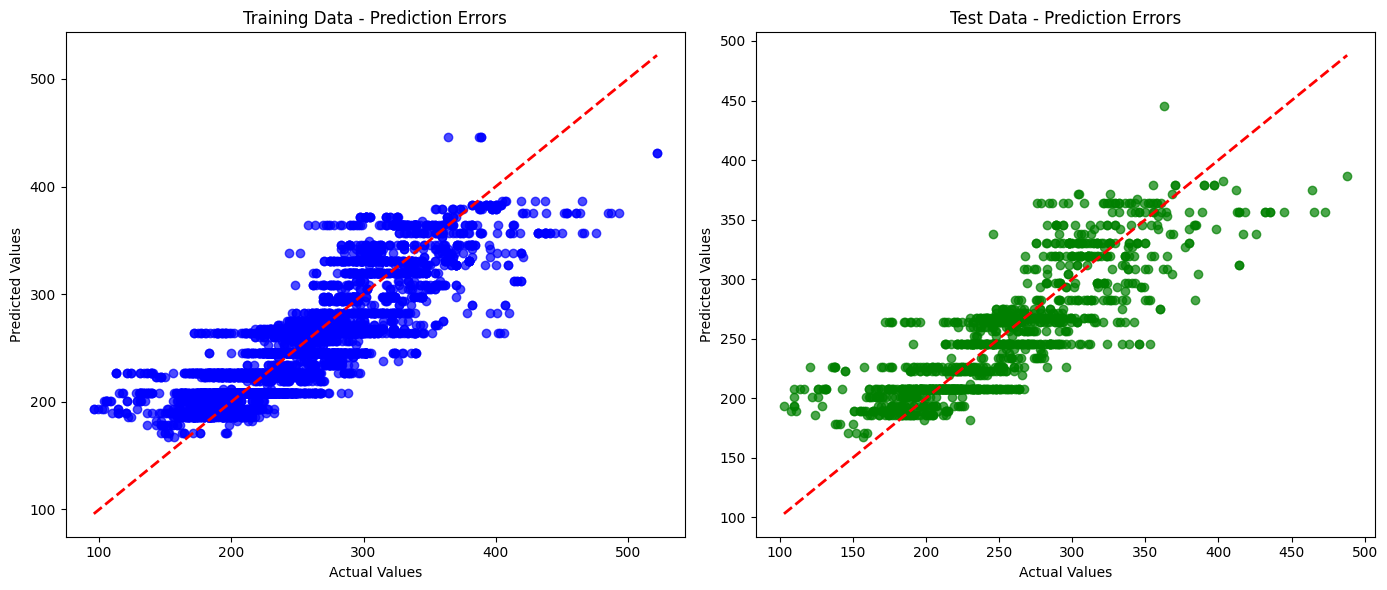

In [53]:
plt.figure(figsize=(14, 6))

# Plot for training dataset
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Data - Prediction Errors")

# Plot for test dataset
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Data - Prediction Errors")

plt.tight_layout()
plt.show()

## Residual Plot

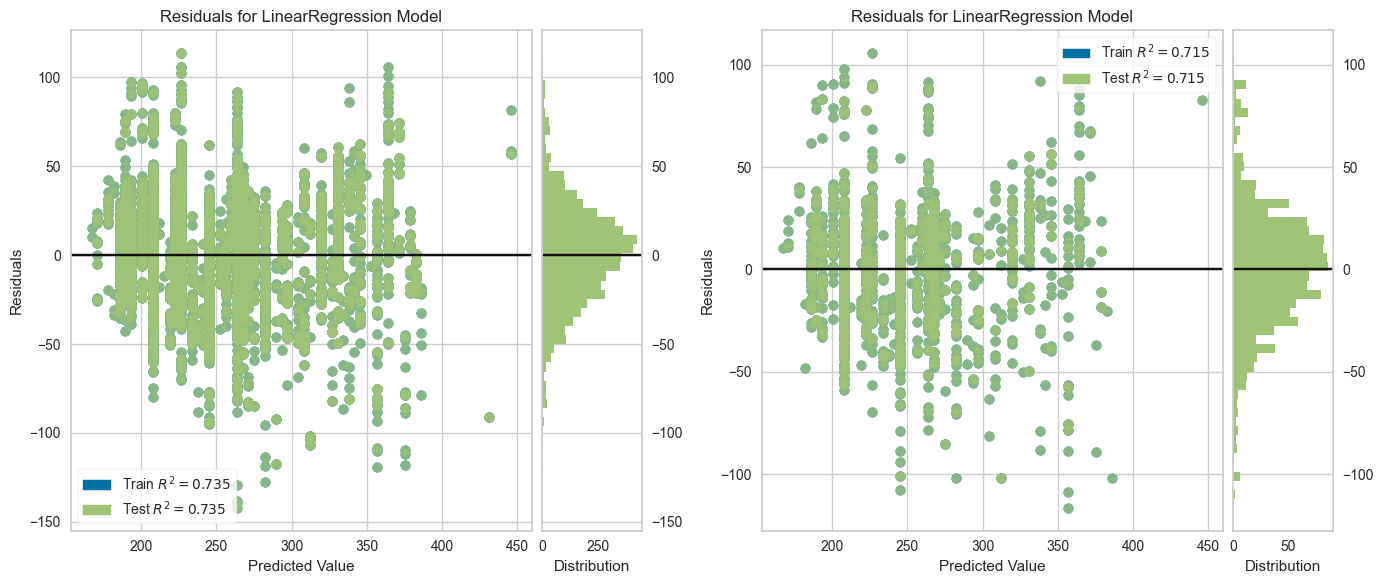

In [54]:
from yellowbrick.regressor import ResidualsPlot

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

visualizer_train = ResidualsPlot(sl_model, ax=axes[0])
visualizer_train.fit(X_train, y_train)  
visualizer_train.score(X_train, y_train)  
visualizer_train.finalize()  

visualizer_test = ResidualsPlot(sl_model, ax=axes[1])
visualizer_test.fit(X_test, y_test)  
visualizer_test.score(X_test, y_test)  
visualizer_test.finalize()  

plt.tight_layout()
plt.show()

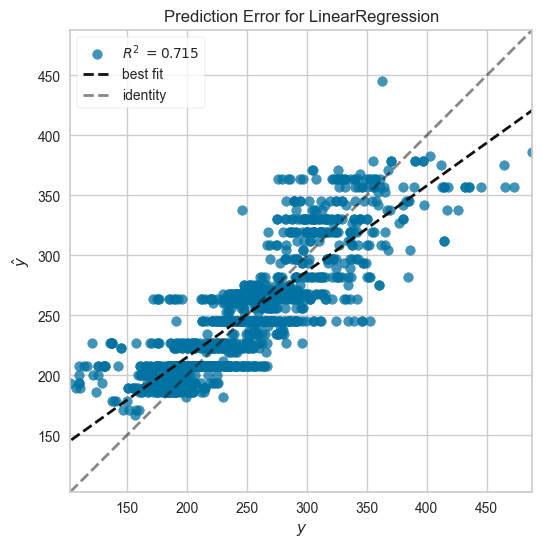

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [55]:
from yellowbrick.regressor import PredictionError

plt.figure(figsize=(8, 6))

visualizer = PredictionError(sl_model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()  


# Multiple Linear Regression Model

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [56]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
numeric_df.corr().style.applymap(color_correlation2)

In [57]:
X = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df['co_2']

## Train | Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (5024, 4)
Train target shape   :  (5024,)
Test features shape  :  (1257, 4)
Test target shape    :  (1257,)


## Training the Model

In [60]:
ml_model = LinearRegression()

In [61]:
ml_model.fit(X_train, y_train)

LinearRegression()

In [62]:
ml_model.intercept_

61.61546112058207

In [63]:
ml_model.coef_

array([13.01280253,  3.37167073,  0.98575634,  8.81717645])

## Predicting Test Data

In [64]:
y_train_pred = ml_model.predict(X_train)
y_test_pred = ml_model.predict(X_test)

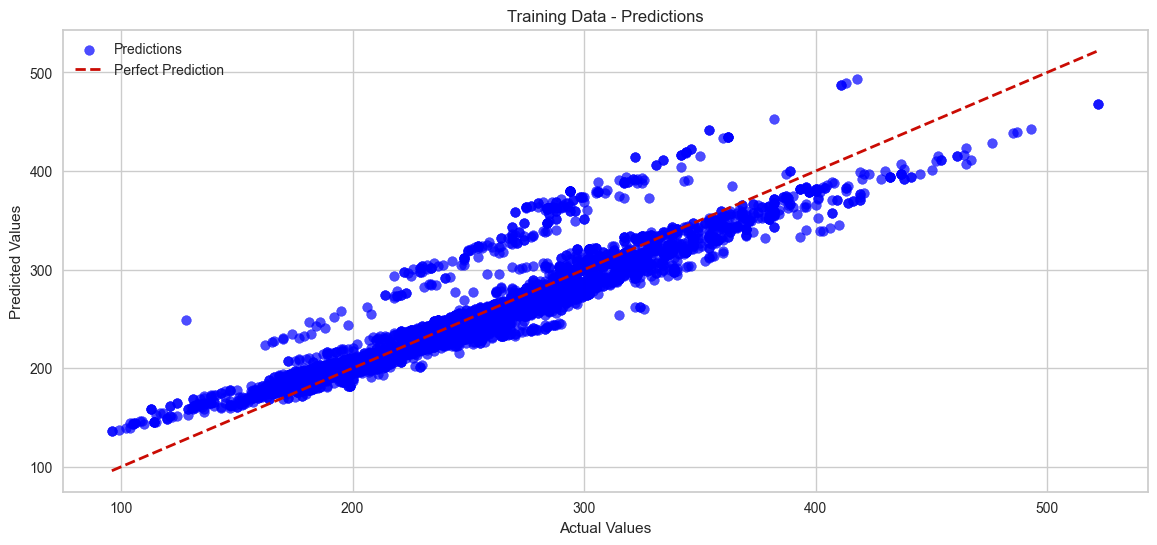

In [65]:
plt.figure(figsize=(14, 6))

# Plot predictions vs actual values for training data
plt.scatter(y_train, y_train_pred, alpha=0.7, color="blue", label="Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Data - Predictions")
plt.legend()

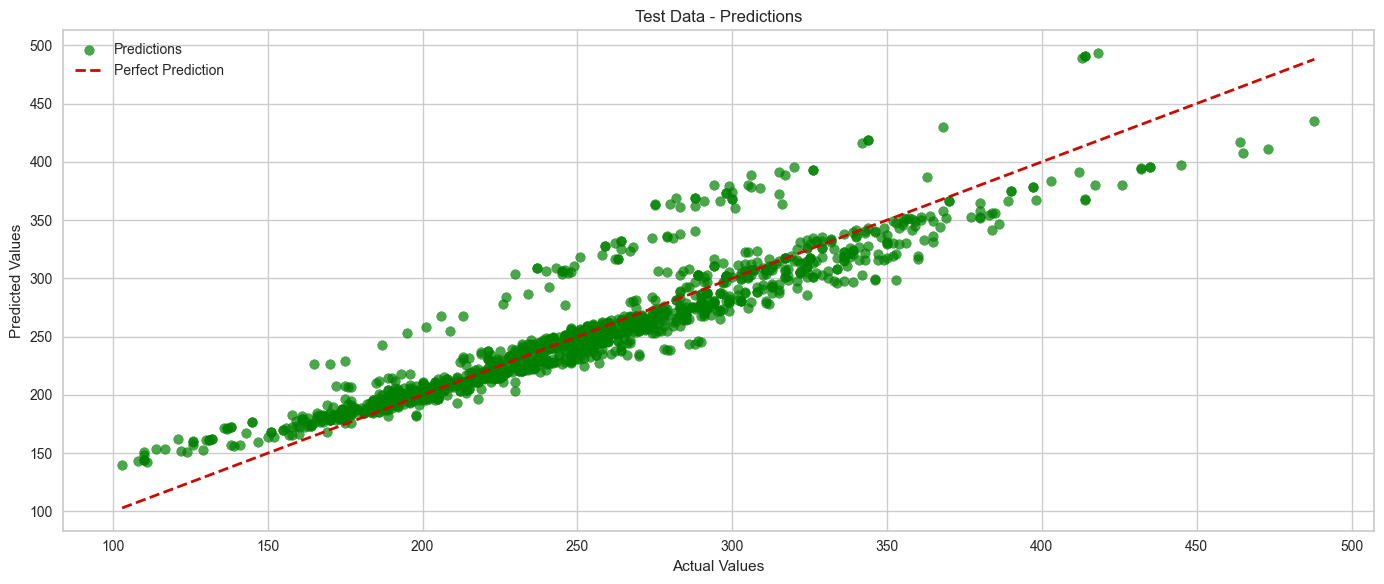

In [66]:
plt.figure(figsize=(14, 6))

# Plot predictions vs actual values for test data
plt.scatter(y_test, y_test_pred, alpha=0.7, color="green", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Data - Predictions")
plt.legend()

plt.tight_layout()
plt.show()

## Evaluating the Model

In [67]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results = {
        'train': {
            'R2': r2_score(y_train, y_train_pred),
            'MAE': mean_absolute_error(y_train, y_train_pred),
            'MSE': mean_squared_error(y_train, y_train_pred),
            'RMSE': mean_squared_error(y_train, y_train_pred, squared=False)
        },
        'val': {
            'R2': r2_score(y_test, y_test_pred),
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'MSE': mean_squared_error(y_test, y_test_pred),
            'RMSE': mean_squared_error(y_test, y_test_pred, squared=False)
        }
    }

    return results

In [68]:
results = train_val(ml_model, X_train, y_train, X_test, y_test)

results_df = pd.DataFrame(results).T
print("Model Performance Results:")
print(results_df)

Model Performance Results:
             R2        MAE         MSE       RMSE
train  0.876561  13.427298  432.955425  20.807581
val    0.860124  14.523595  495.860998  22.267937


In [69]:
metrics = {
    "Mean Squared Error": [results['train']['MSE'], results['val']['MSE']],
    "Mean Absolute Error": [results['train']['MAE'], results['val']['MAE']],
    "R^2 Score": [results['train']['R2'], results['val']['R2']]
}

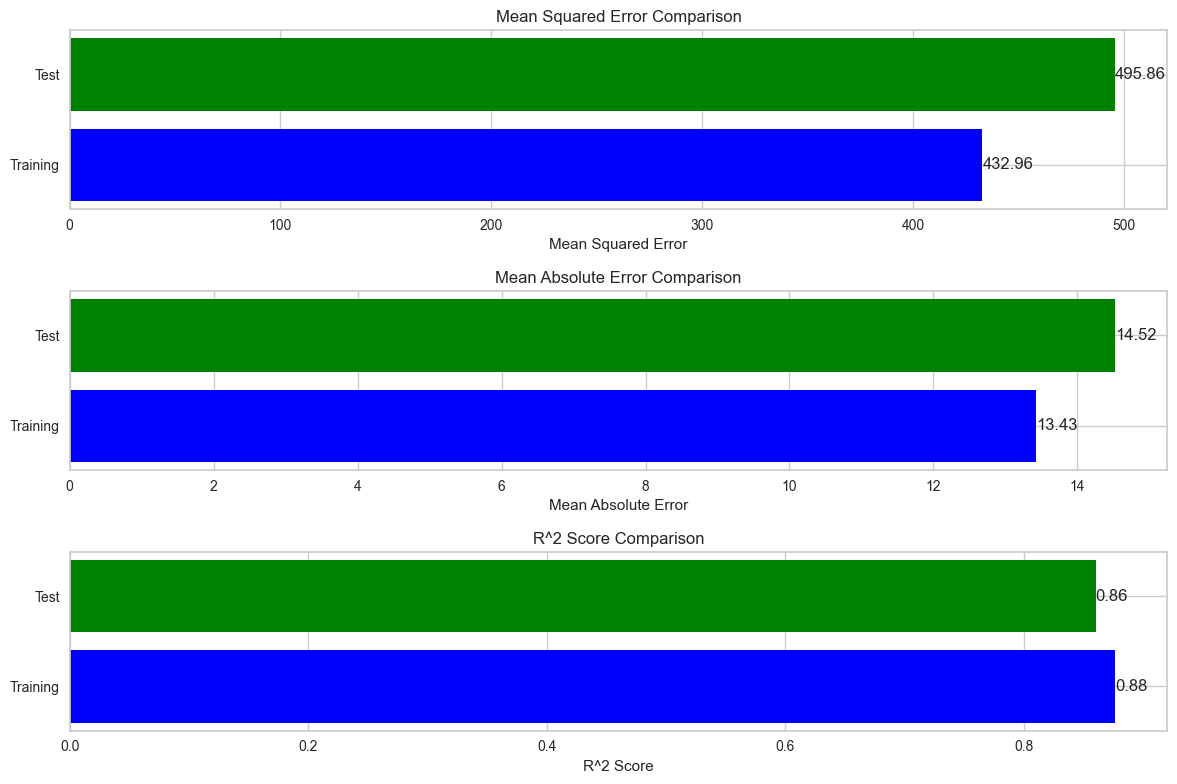

In [70]:
plt.figure(figsize=(12, 8))

for i, (metric_name, values) in enumerate(metrics.items()):
    plt.subplot(3, 1, i + 1)
    bars = plt.barh(["Training", "Test"], values, color=['blue', 'green'])
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2,
                 f'{width:.2f}', va='center', ha='left')

    plt.xlabel(metric_name)
    plt.title(f"{metric_name} Comparison")

plt.tight_layout()
plt.show()

## Residual Plot

In [71]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

Actual        pred   residual
3296     193  208.079771 -15.079771
5311     249  226.641547  22.358453
3586     249  267.477454 -18.477454
7199     174  189.517995 -15.517995
2916     256  208.079771  47.920229
2558     194  185.805640   8.194360
2812     329  345.436912 -16.436912
5665     321  363.998688 -42.998688
3442     240  208.079771  31.920229
3076     294  274.902164  19.097836
6336     228  245.203323 -17.203323
6943     161  208.079771 -47.079771
1291     294  363.998688 -69.998688
991      189  263.765098 -74.765098
3622     163  185.805640 -22.805640
4628     246  208.079771  37.920229
6313     242  245.203323  -3.203323
3805     164  189.517995 -25.517995
3716     324  319.450426   4.549574
2779     311  319.450426  -8.450426

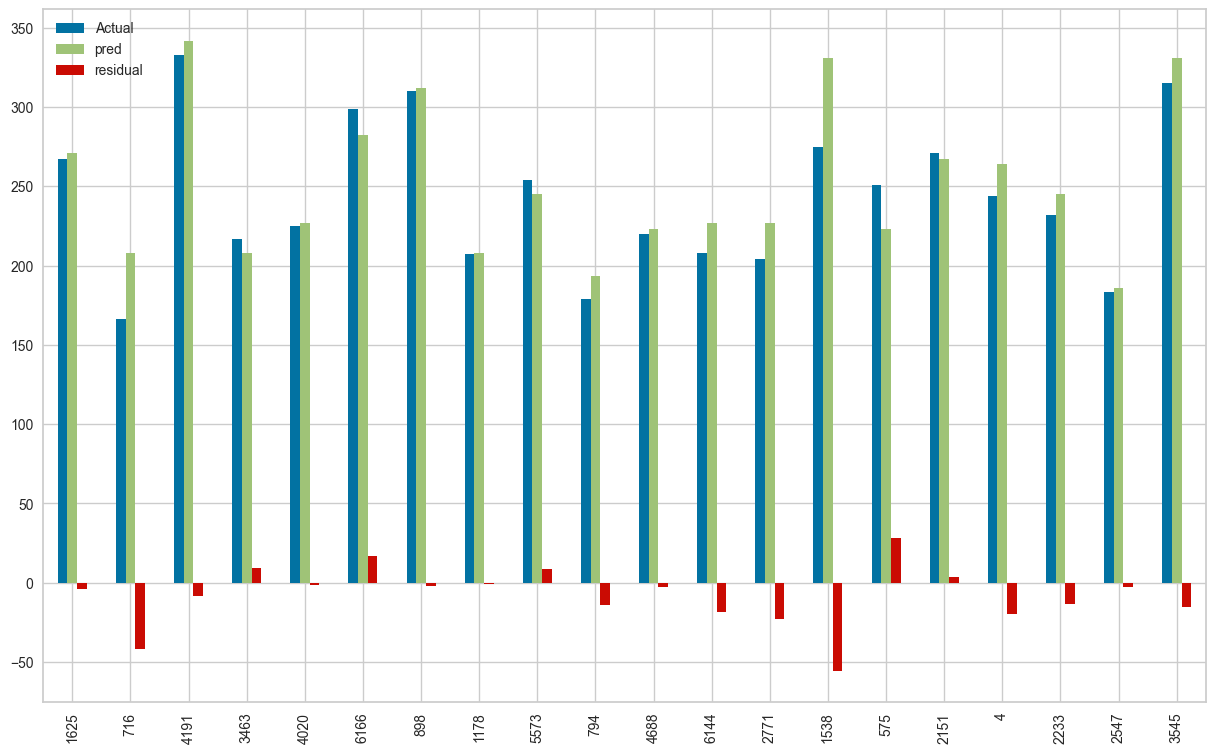

In [72]:
compare.tail(20).plot(kind ="bar", figsize =(15,9))
plt.show();

In [73]:
y_train_pred = ml_model.predict(X_train)
y_test_pred = ml_model.predict(X_test)
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

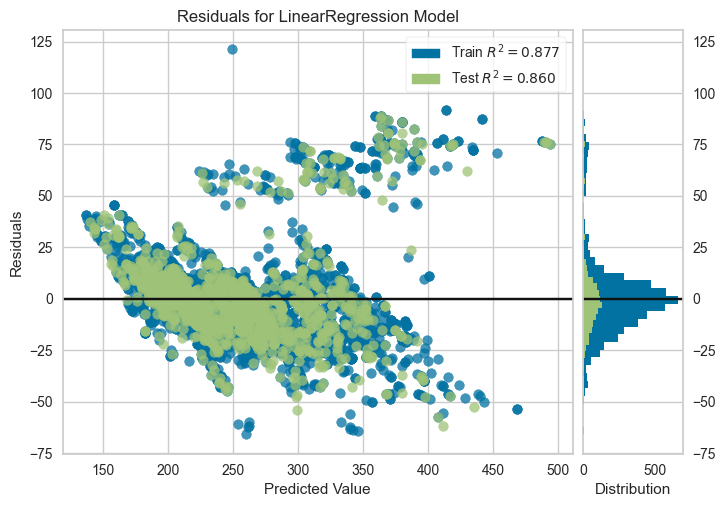

In [74]:
ml_model = LinearRegression()
visualizer = ResidualsPlot(ml_model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();  

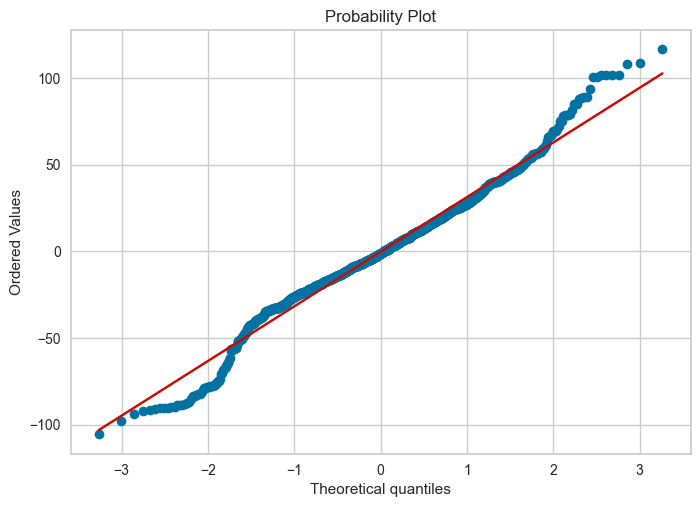

In [75]:
import scipy.stats as stats

residuals = y_test-y_pred

stats.probplot(residuals, dist ="norm", plot =plt);

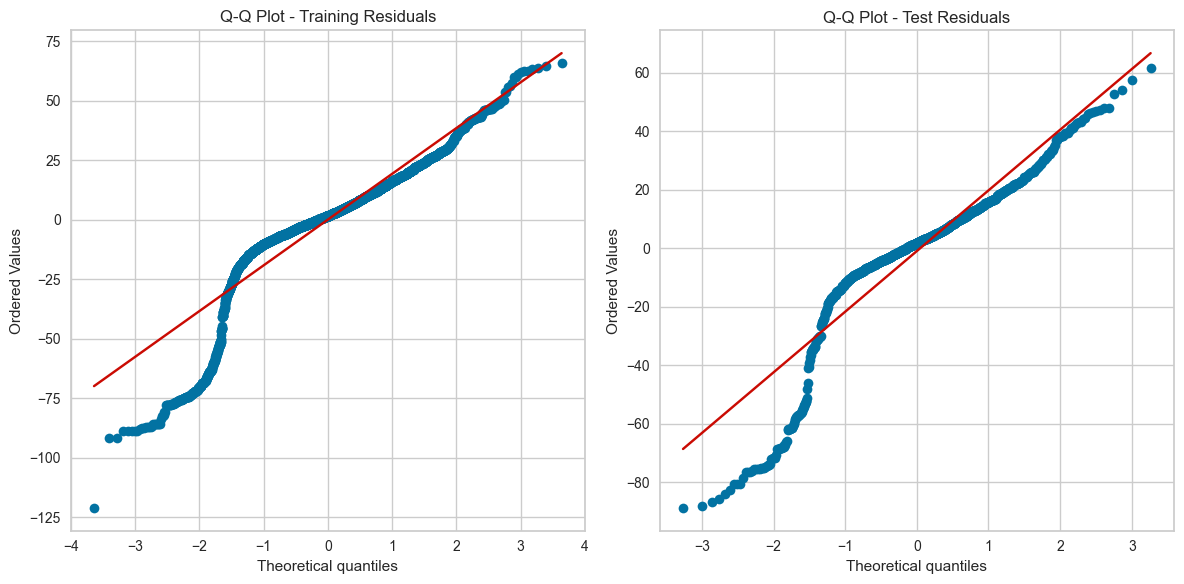

In [76]:
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title("Q-Q Plot - Training Residuals")

plt.subplot(1, 2, 2)
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Q-Q Plot - Test Residuals")

plt.tight_layout()
plt.show()

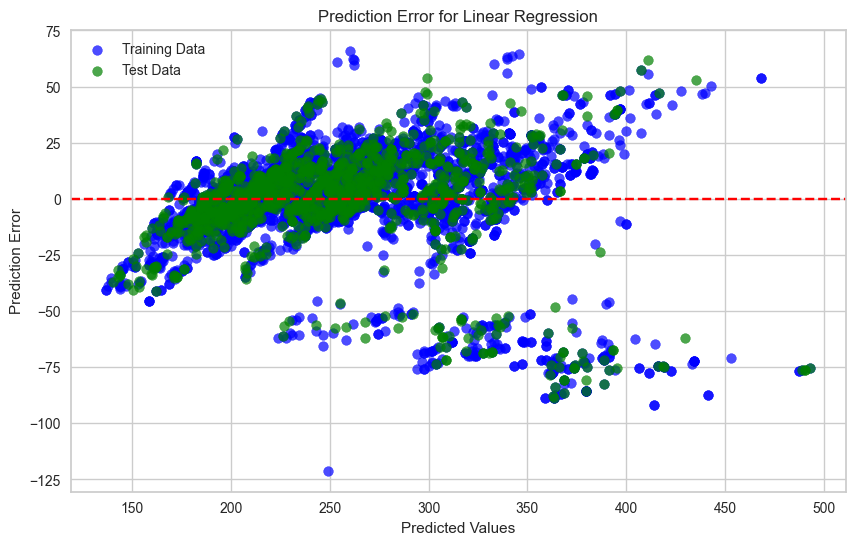

In [77]:
errors_train = y_train - y_train_pred
errors_test = y_test - y_test_pred

plt.figure(figsize=(10, 6))

plt.scatter(y_train_pred, errors_train, alpha=0.7, color="blue", label="Training Data")
plt.scatter(y_test_pred, errors_test, alpha=0.7, color="green", label="Test Data")

plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Prediction Error")
plt.title("Prediction Error for Linear Regression")
plt.legend()

plt.show()

# Regularization

## Polynomial Conversion

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

In [79]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

In [80]:
feature_names = polynomial_converter.get_feature_names_out(X.columns)
poly_df = pd.DataFrame(poly_features, columns=feature_names)
print(poly_df.head())

   engine_size  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  engine_size^2  \
0          2.0             9.9            6.7             8.5           4.00   
1          2.4            11.2            7.7             9.6           5.76   
2          1.5             6.0            5.8             5.9           2.25   
3          3.5            12.7            9.1            11.1          12.25   
4          3.5            12.1            8.7            10.6          12.25   

   engine_size fuel_cons_city  engine_size fuel_cons_hwy  \
0                       19.80                      13.40   
1                       26.88                      18.48   
2                        9.00                       8.70   
3                       44.45                      31.85   
4                       42.35                      30.45   

   engine_size fuel_cons_comb  fuel_cons_city^2  fuel_cons_city fuel_cons_hwy  \
0                       17.00             98.01                         66.33

## Train | Test Split

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
X_train, X_test, y_train, y_test = train_test_split(poly_df, y, test_size=0.2, random_state=42)

## Scaling the Data

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(poly_df)

In [85]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.85097434, -0.73455363, -0.3819925 , ..., -0.47150298,
        -0.51803558, -0.55816852],
       [ 0.90702256,  0.6727411 ,  0.32010743, ...,  0.11902315,
         0.18898146,  0.25701701],
       [ 1.34652178,  0.64459521,  0.1884637 , ...,  0.02018493,
         0.0933493 ,  0.16600311],
       ...,
       [-1.14397382, -2.33886963, -2.04947983, ..., -0.99744553,
        -1.00662866, -1.00706548],
       [-0.85097434, -1.12859616, -0.73304246, ..., -0.64347566,
        -0.68433165, -0.71690914],
       [-0.48472498, -0.8752831 , -0.73304246, ..., -0.6165773 ,
        -0.63505703, -0.64974291]])

In [86]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.18475631e-01,  7.29032894e-01,  1.54878231e+00, ...,
         1.10431270e+00,  8.97883677e-01,  7.03625766e-01],
       [-1.18475631e-01,  6.44595210e-01,  3.20107434e-01, ...,
         1.09588091e-01,  1.69209407e-01,  2.26194950e-01],
       [ 3.21023593e-01,  6.16449315e-01,  5.83394908e-01, ...,
         2.80865227e-01,  2.87302627e-01,  2.88328292e-01],
       ...,
       [ 3.21023593e-01,  3.63136263e-01,  1.88463697e-01, ...,
        -2.41462814e-02,  1.30328666e-03,  2.38153737e-02],
       [-9.97474078e-01, -1.01601258e+00, -9.96329935e-01, ...,
        -7.15816338e-01, -7.24454698e-01, -7.29390896e-01],
       [-8.50974337e-01, -9.03428998e-01, -8.64686198e-01, ...,
        -6.68186197e-01, -6.81456830e-01, -6.91005696e-01]])

# Ridge Regression

In [87]:
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)

Ridge()

In [88]:
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

In [89]:
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):
    results = {
        'train': {
            'R2': r2_score(y_train, y_train_pred),
            'mae': mean_absolute_error(y_train, y_train_pred),
            'mse': mean_squared_error(y_train, y_train_pred),
            'rmse': np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        'val': {
            'R2': r2_score(y_test, y_test_pred),
            'mae': mean_absolute_error(y_test, y_test_pred),
            'mse': mean_squared_error(y_test, y_test_pred),
            'rmse': np.sqrt(mean_squared_error(y_test, y_test_pred))
        }
    }
    return results

In [90]:
results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
print("Ridge Regression Performance Result:")
print(pd.DataFrame(results).T)

Ridge Regression Performance Result:
             R2       mae         mse      rmse
train  0.929360  9.248428  245.744488  15.67624
val    0.919841  9.813492  293.391670  17.12868


# Lasso Regression

In [91]:
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [92]:
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

In [93]:
results = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
print("Lasso Regression Performance Result:")
print(pd.DataFrame(results).T)

Lasso Regression Performance Result:
             R2       mae         mse       rmse
train  0.921428  9.014226  273.338030  16.532938
val    0.910969  9.493846  325.862757  18.051669


In [94]:
print(X_train.columns)

Index(['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb',
       'engine_size^2', 'engine_size fuel_cons_city',
       'engine_size fuel_cons_hwy', 'engine_size fuel_cons_comb',
       'fuel_cons_city^2', 'fuel_cons_city fuel_cons_hwy',
       'fuel_cons_city fuel_cons_comb', 'fuel_cons_hwy^2',
       'fuel_cons_hwy fuel_cons_comb', 'fuel_cons_comb^2', 'engine_size^3',
       'engine_size^2 fuel_cons_city', 'engine_size^2 fuel_cons_hwy',
       'engine_size^2 fuel_cons_comb', 'engine_size fuel_cons_city^2',
       'engine_size fuel_cons_city fuel_cons_hwy',
       'engine_size fuel_cons_city fuel_cons_comb',
       'engine_size fuel_cons_hwy^2',
       'engine_size fuel_cons_hwy fuel_cons_comb',
       'engine_size fuel_cons_comb^2', 'fuel_cons_city^3',
       'fuel_cons_city^2 fuel_cons_hwy', 'fuel_cons_city^2 fuel_cons_comb',
       'fuel_cons_city fuel_cons_hwy^2',
       'fuel_cons_city fuel_cons_hwy fuel_cons_comb',
       'fuel_cons_city fuel_cons_comb^2', 'fuel_

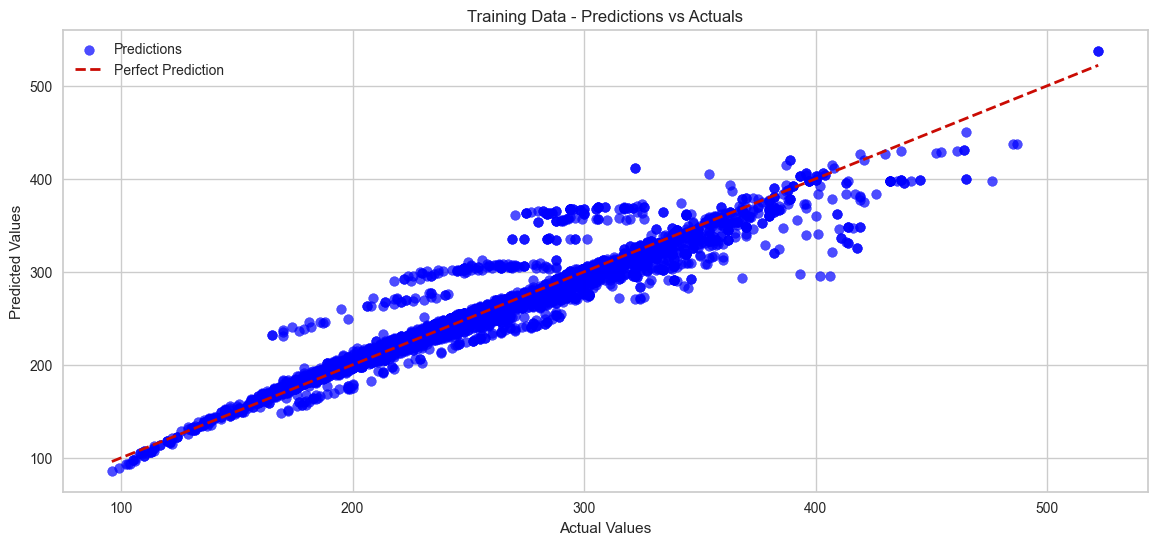

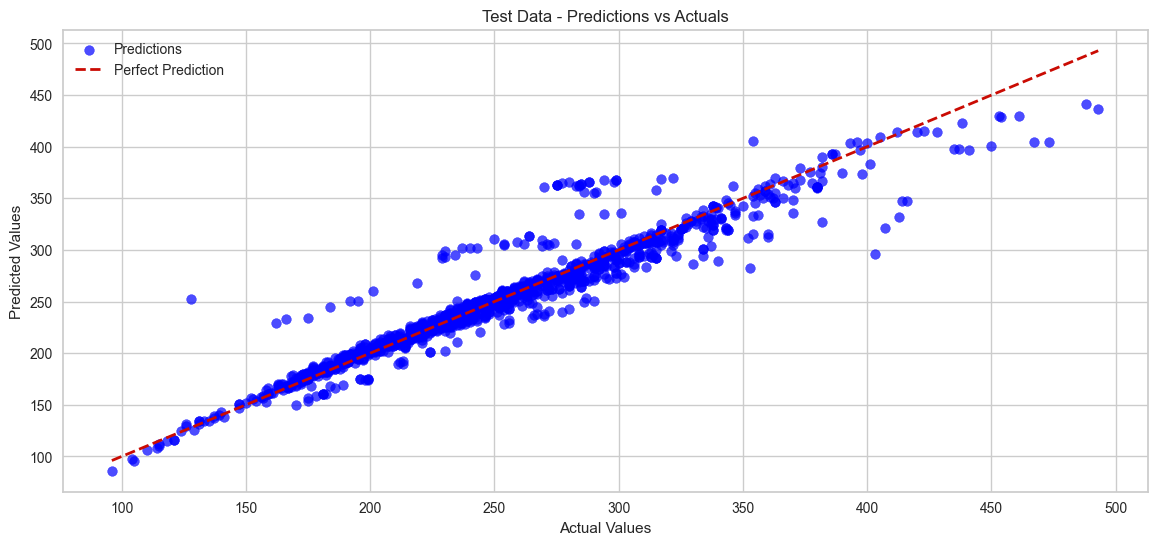

In [95]:
def plot_predictions_vs_actuals(y_true, y_pred, title):
    plt.figure(figsize=(14, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color="blue", label="Predictions")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label="Perfect Prediction")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions_vs_actuals(y_train, y_train_pred, "Training Data - Predictions vs Actuals")
plot_predictions_vs_actuals(y_test, y_test_pred, "Test Data - Predictions vs Actuals")

def plot_errors(y_true, y_pred, title):
    errors = y_true - y_pred
    plt.figure(figsize=(14, 6))
    sns.histplot(errors, bins=30, kde=True, color="purple")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.grid(True)
    plt.show()

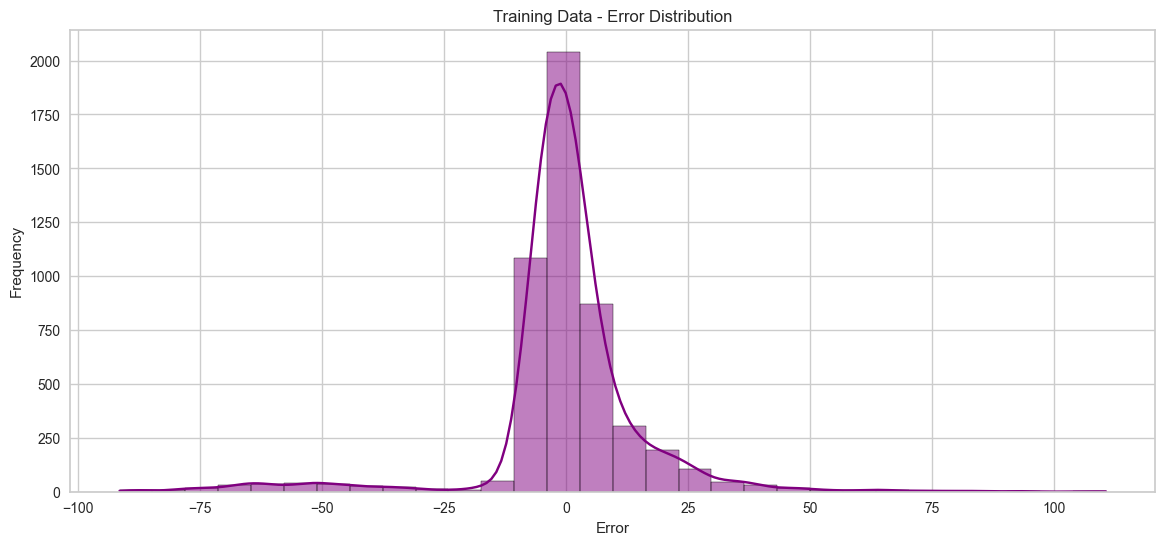

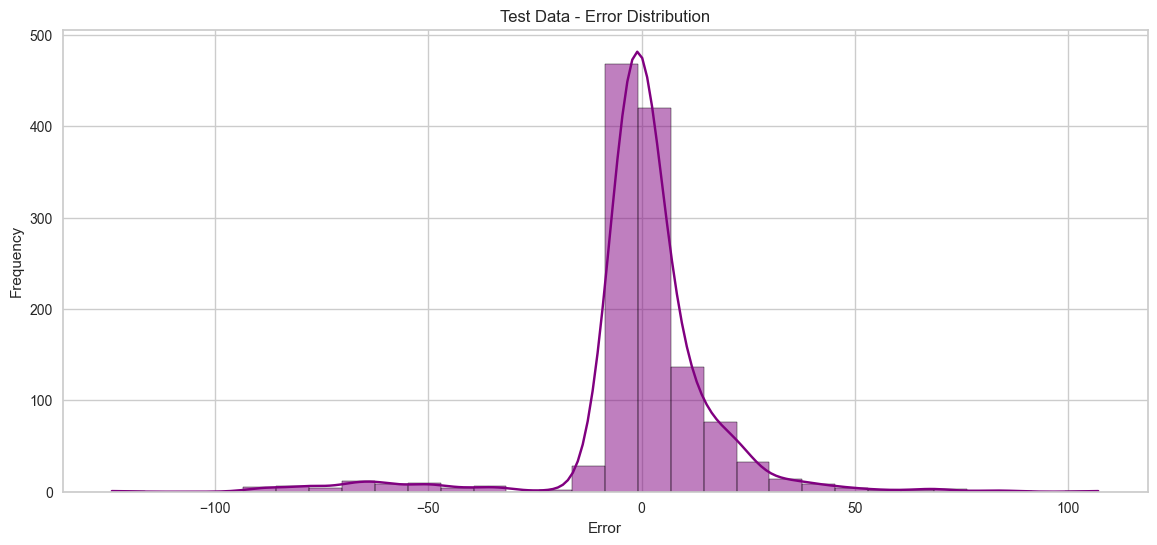

In [96]:
plot_errors(y_train, y_train_pred, "Training Data - Error Distribution")
plot_errors(y_test, y_test_pred, "Test Data - Error Distribution")

# Feature importances with Ridge

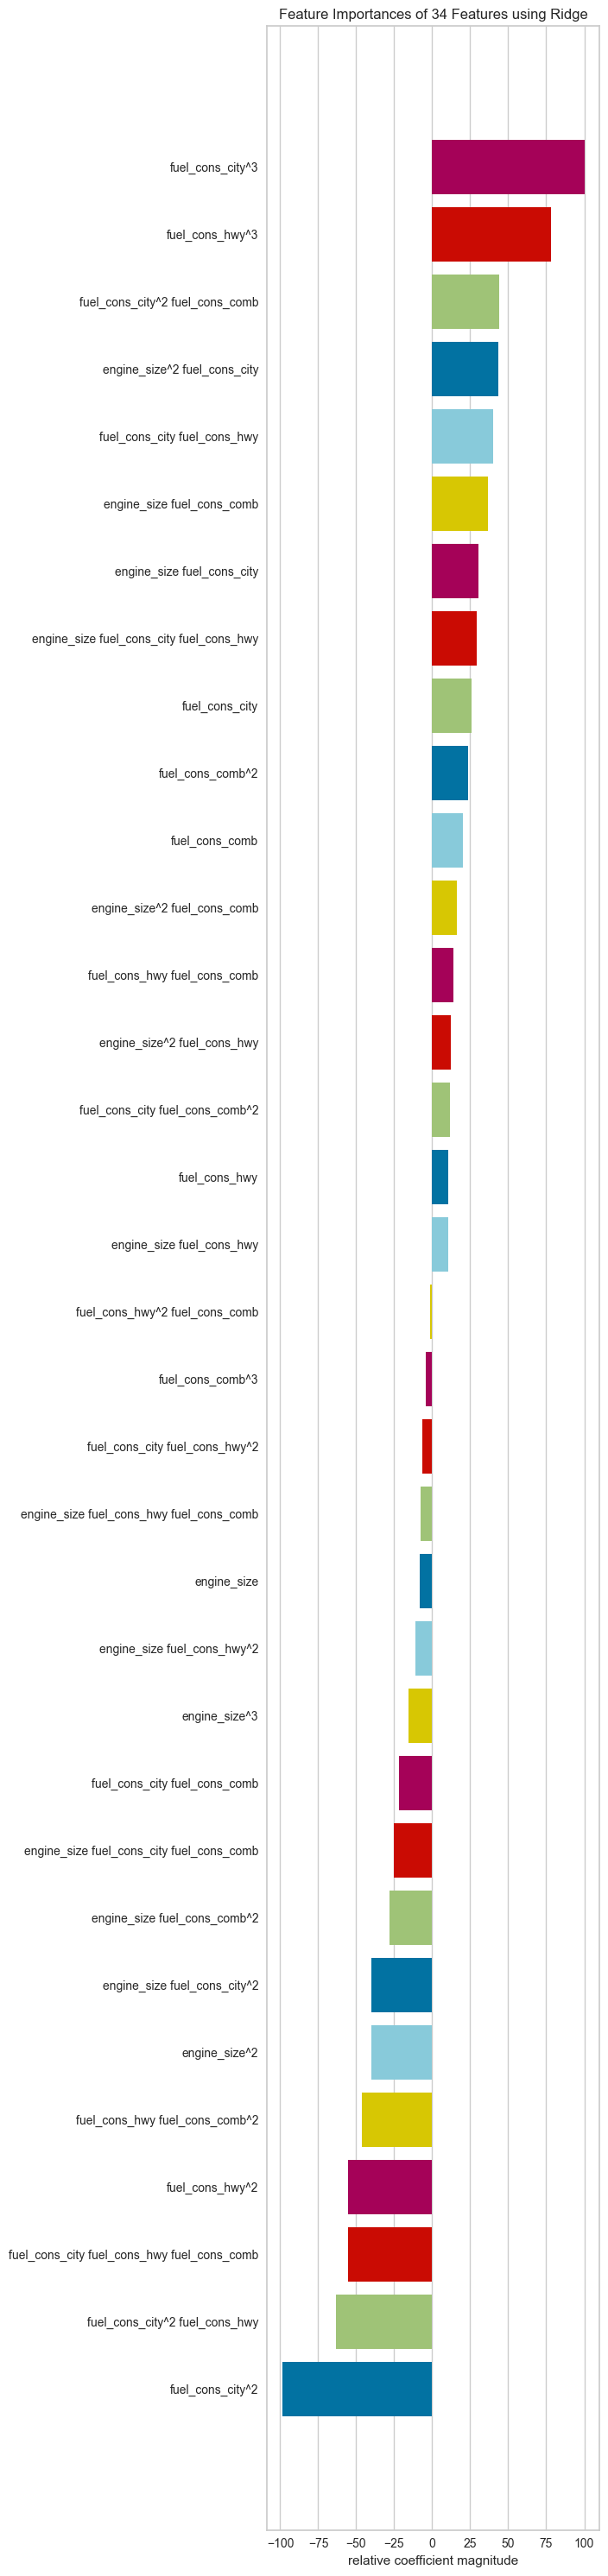

In [97]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# Feature importances with Lasso

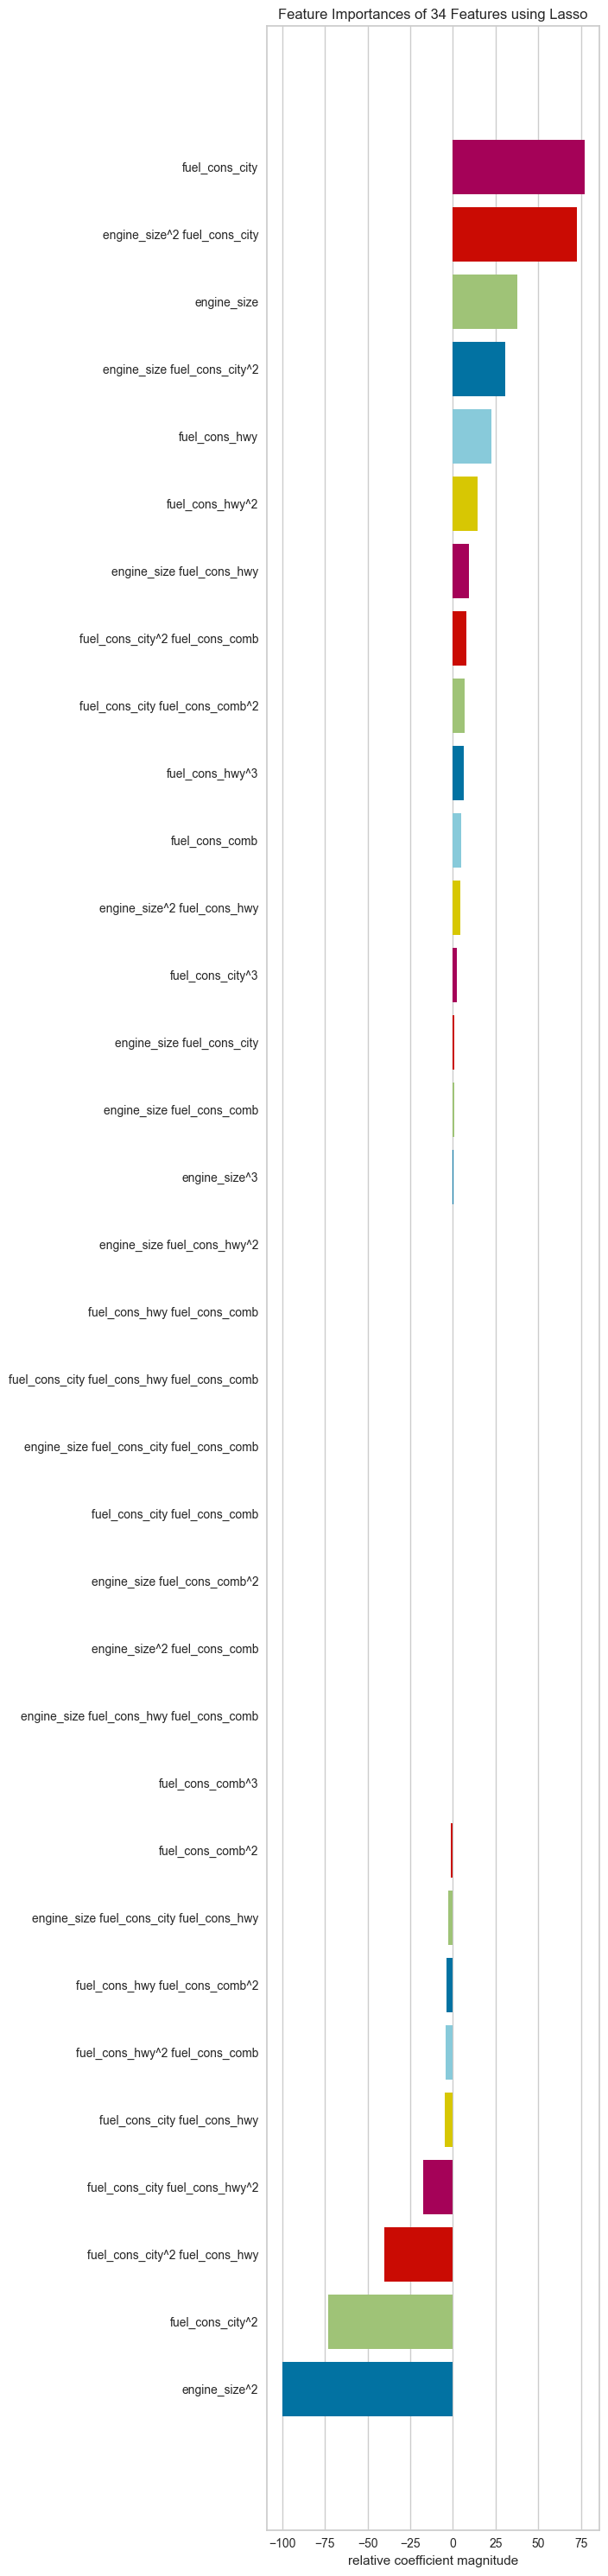

In [98]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

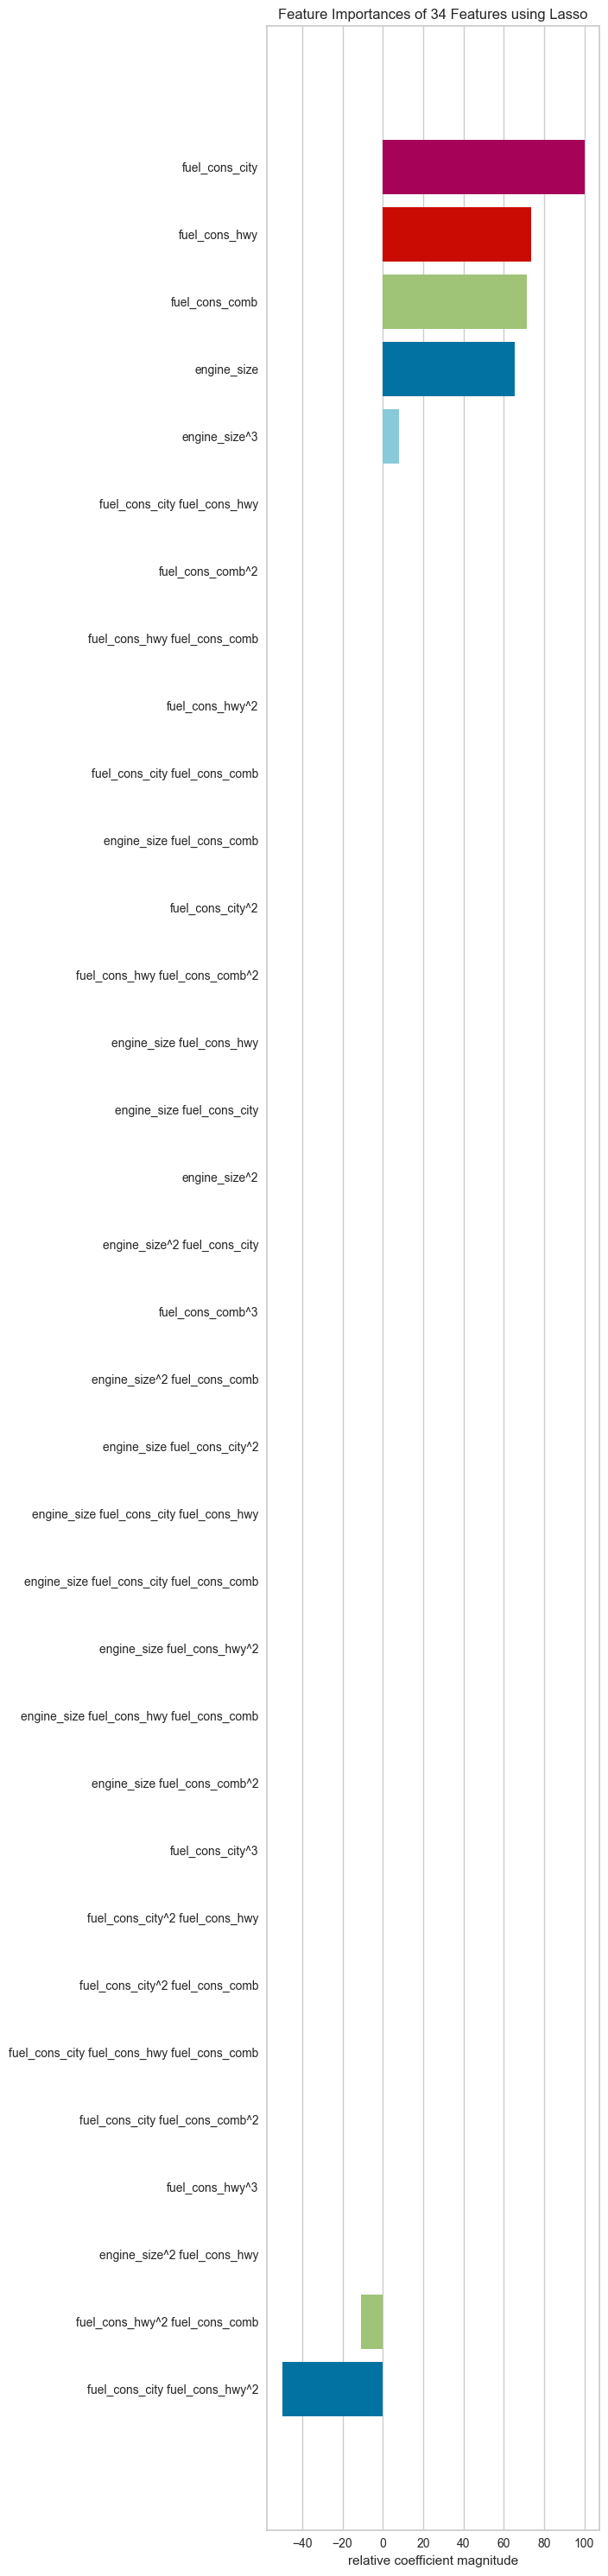

In [99]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# Final Model and Prediction

In [100]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [101]:
final_model.coef_

array([13.30754651,  2.97651145,  0.62392952,  9.35286764])

In [102]:
final_model.intercept_

62.849968744024864

In [103]:
X.loc[[3711,5976]]

engine_size  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb
3711          5.0            15.8            9.8            13.1
5976          3.0            11.9            8.5            10.4

In [104]:
new_data = pd.DataFrame({
    'engine_size': [2.0, 2.4, 1.5, 3.5, 3.5],
    'fuel_cons_city': [9.9, 11.2, 6.0, 12.7, 12.1],
    'fuel_cons_hwy': [6.7, 7.7, 5.8, 9.1, 8.7],
    'fuel_cons_comb': [8.5, 9.6, 5.9, 11.1, 10.6],
})

In [105]:
predictions = ml_model.predict(new_data)

In [106]:
new_data['Predictions'] = predictions

print(new_data)

   engine_size  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  Predictions
0          2.0             9.9            6.7             8.5   202.571174
1          2.4            11.2            7.7             9.6   222.844117
2          1.5             6.0            5.8             5.9   159.103417
3          3.5            12.7            9.1            11.1   256.821529
4          3.5            12.1            8.7            10.6   249.995636
